In [1]:
!pip install prometheus-api-client


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\marti\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import networkx as nx
import raphtory as rp
import datetime
from dateutil.relativedelta import relativedelta
from prometheus_api_client import PrometheusConnect, MetricsList, Metric, MetricSnapshotDataFrame, MetricRangeDataFrame
#prom = PrometheusConnect(url ="http://172.189.51.189:80", disable_ssl=True)
#prom = PrometheusConnect(url ="http://raphtory03:10000", disable_ssl=True)
prom = PrometheusConnect(url ="http://4.178.243.119:9090", disable_ssl=True)


ModuleNotFoundError: No module named 'prometheus_api_client'

In [ ]:
#Print all possible metrcis to monitir from prometheus
prom.all_metrics()

['ALERTS',
 'ALERTS_FOR_STATE',
 'aggregator_discovery_aggregation_count_total',
 'aggregator_unavailable_apiservice',
 'aggregator_unavailable_apiservice_total',
 'apiextensions_apiserver_validation_ratcheting_seconds_bucket',
 'apiextensions_apiserver_validation_ratcheting_seconds_count',
 'apiextensions_apiserver_validation_ratcheting_seconds_sum',
 'apiextensions_openapi_v2_regeneration_count',
 'apiextensions_openapi_v3_regeneration_count',
 'apiserver_admission_controller_admission_duration_seconds_bucket',
 'apiserver_admission_controller_admission_duration_seconds_count',
 'apiserver_admission_controller_admission_duration_seconds_sum',
 'apiserver_admission_step_admission_duration_seconds_bucket',
 'apiserver_admission_step_admission_duration_seconds_count',
 'apiserver_admission_step_admission_duration_seconds_sum',
 'apiserver_admission_step_admission_duration_seconds_summary',
 'apiserver_admission_step_admission_duration_seconds_summary_count',
 'apiserver_admission_step_a

In [4]:

ns="ob"
start="2025-04-16 19:30:00"
end="2025-04-16 19:50:00"
start = datetime.datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
end = datetime.datetime.strptime(end, "%Y-%m-%d %H:%M:%S")
print("Start: ", start, "End: ", end)

Start:  2025-04-16 19:30:00 End:  2025-04-16 19:50:00


In [5]:
#This function will generate windows of size minute_size between start and end times
def generete_windows(start,end, minute_size):
    #start_time = datetime.datetime.strptime(start, "%Y-%m-%d %H:%M:%S")
    #end_time = datetime.datetime.strptime(end, "%Y-%m-%d %H:%M:%S")
    #start_date = datetime.datetime.strptime("2025-01-14 17:06:56", "%Y-%m-%d %H:%M:%S")
    #end_date = datetime.datetime.strptime("2025-01-14 23:51:55", "%Y-%m-%d %H:%M:%S")

    minutes_diff = (end - start).total_seconds() / 60.0
    #minutes_diff = (end - start).total_seconds()
    window_mimutes_size=minute_size
    number_of_windows = int(minutes_diff//window_mimutes_size)
    print(number_of_windows)


    # initializing dates
    window_generated = pd.date_range(start, end, periods=number_of_windows+1)
    #print(type(window_generated))
    print(window_generated.strftime("%Y-%m-%d %H:%M:%S"))
    return window_generated,number_of_windows
window_generated,number_of_windows=generete_windows(start,end, 1)

20
Index(['2025-04-16 19:30:00', '2025-04-16 19:31:00', '2025-04-16 19:32:00',
       '2025-04-16 19:33:00', '2025-04-16 19:34:00', '2025-04-16 19:35:00',
       '2025-04-16 19:36:00', '2025-04-16 19:37:00', '2025-04-16 19:38:00',
       '2025-04-16 19:39:00', '2025-04-16 19:40:00', '2025-04-16 19:41:00',
       '2025-04-16 19:42:00', '2025-04-16 19:43:00', '2025-04-16 19:44:00',
       '2025-04-16 19:45:00', '2025-04-16 19:46:00', '2025-04-16 19:47:00',
       '2025-04-16 19:48:00', '2025-04-16 19:49:00', '2025-04-16 19:50:00'],
      dtype='object')


In [6]:
def collect_metrics(start_time, end_time, metric, namespace):
    # Connect to Prometheus
    #prom = PrometheusConnect(url=prom, disable_ssl=True)
    
    # Convert string timestamps to datetime objects
    #start_dt = datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")
    #end_dt = datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S")
    
    #Collect CPU metrics
    rate(istio_requests_total{  destination_service_name="service-b",  source_service_name="service-a" }[5m])
    metric_query = f'sum(rate({metric}{{namespace="{namespace}", container!="POD", container!=""}}[1m])) by (pod,instance)'
    metric_data = prom.custom_query_range(
        query=metric_query,
        start_time=start_time,
        end_time=end_time,
        step="1s"
    )
    metric_df = MetricRangeDataFrame(metric_data)
    #print(metric_df.head(10))
    
    metric_df = metric_df[['instance','pod', 'value']].rename(columns={'value': metric})
    return metric_df

container_memory_working_set_bytes=collect_metrics(start,end,'container_memory_working_set_bytes', 'ob')
container_memory_working_set_bytes.head(30)

container_cpu_usage_seconds_total=collect_metrics(start,end,'container_cpu_usage_seconds_total', 'ob')
container_cpu_usage_seconds_total.head(30)
#unique_nodes = container_cpu_usage_seconds_total['instance'].unique()
#print(unique_nodes)

SyntaxError: invalid decimal literal (1640935983.py, line 10)

In [7]:
def collect_metrics(start_time, end_time, metric, namespace):
    # Connect to Prometheus
    #prom = PrometheusConnect(url=prom, disable_ssl=True)
    
    # Convert string timestamps to datetime objects
    #start_dt = datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")
    #end_dt = datetime.strptime(end_time, "%Y-%m-%d %H:%M:%S")
    
    #Collect CPU metrics
    rate(istio_requests_total{ destination_service_name="service-b",  source_service_name="service-a" }[5m])
    metric_query = f'sum(rate({metric}{{namespace="{namespace}", container!="POD", container!=""}}[1m])) by (pod,instance)'
    metric_data = prom.custom_query_range(
        query=metric_query,
        start_time=start_time,
        end_time=end_time,
        step="1s"
    )
    metric_df = MetricRangeDataFrame(metric_data)
    #print(metric_df.head(10))
    
    metric_df = metric_df[['instance','pod', 'value']].rename(columns={'value': metric})
    return metric_df

container_memory_working_set_bytes=collect_metrics(start,end,'container_memory_working_set_bytes', 'ob')
container_memory_working_set_bytes.head(30)

container_cpu_usage_seconds_total=collect_metrics(start,end,'container_cpu_usage_seconds_total', 'ob')
container_cpu_usage_seconds_total.head(30)
#unique_nodes = container_cpu_usage_seconds_total['instance'].unique()
#print(unique_nodes)

SyntaxError: invalid decimal literal (474376072.py, line 10)

In [ ]:
def gen_metric_all(metric,start,end,freq):
    #a=prom.custom_query_range(metric+'{namespace="ob", reporter="destination", request_protocol="http" , response_code="200",}',start, end,freq)
    
    metric_query = f'sum(rate({metric}{{namespace="{namespace}", container!="POD", container!=""}}[1m])) by (pod,instance)'
    a=prom.custom_query_range(metric+'{namespace="ob", reporter="destination",}',start, end,freq)
    metric_df9  = MetricRangeDataFrame(a)
    data=metric_df9[['source_workload', 'destination_workload','request_protocol','response_flags','reporter','response_code','grpc_response_status','value']]
    data=data.sort_values(by='timestamp')
    data = data[data['source_workload'] != "unknown"]

    # Get all unique values from the response_code column
    unique_response_codes = data['response_code'].unique()
    print(unique_response_codes)

    # Get all unique values from the grpc_response_status column
    unique_grpc_response_codes = data['grpc_response_status'].unique()
    print(unique_grpc_response_codes)


    # Get all unique values from the response_flags column
    unique_response_flags = data['response_flags'].unique()
    print(unique_response_flags)

    # Get all unique values from the request_protocol column
    unique_request_protocol = data['request_protocol'].unique()
    print(unique_request_protocol)
    return data

In [ ]:
gen_metric_all('istio_requests_total',start,end,1)

['200' '0' '500' '302']
['0' '9' nan '-1' '13']
['-' 'DR']
['grpc' 'http']


source_workload   destination_workload  \
timestamp                                                           
2025-04-16 17:30:00               frontend              adservice   
2025-04-16 17:30:00        checkoutservice        shippingservice   
2025-04-16 17:30:00        checkoutservice            cartservice   
2025-04-16 17:30:00               frontend  recommendationservice   
2025-04-16 17:30:00  recommendationservice  productcatalogservice   
...                                    ...                    ...   
2025-04-16 17:50:00        checkoutservice  productcatalogservice   
2025-04-16 17:50:00               frontend  productcatalogservice   
2025-04-16 17:50:00  recommendationservice  productcatalogservice   
2025-04-16 17:50:00          loadgenerator               frontend   
2025-04-16 17:50:00               frontend        shippingservice   

                    request_protocol response_flags     reporter  \
timestamp                                                          
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
...                              ...            ...          ...   
2025-04-16 17:50:00             grpc              -  destination   
2025-04-16 17:50:00             grpc              -  destination   
2025-04-16 17:50:00             grpc              -  destination   
2025-04-16 17:50:00             http              -  destination   
2025-04-16 17:50:00             grpc              -  destination   

                    response_code grpc_response_status     value  
timestamp                                                         
2025-04-16 17:30:00           200                    0   75156.0  
2025-04-16 17:30:00           200                    0    9389.0  
2025-04-16 17:30:00           200                    0    9385.0  
2025-04-16 17:30:00           200                    0   93655.0  
2025-04-16 17:30:00           200                    0   94064.0  
...                           ...                  ...       ...  
2025-04-16 17:50:00           200                    0   16938.0  
2025-04-16 17:50:00           200                    0  907794.0  
2025-04-16 17:50:00           200                    0  139376.0  
2025-04-16 17:50:00           200                  NaN  160407.0  
2025-04-16 17:50:00           200                    0   41820.0  

[26422 rows x 8 columns]

In [ ]:
gen_metric_all('istio_request_duration_milliseconds_sum',start,end,1)

['200' '0' '500' '302']
['0' '9' nan '-1' '13']
['-' 'DR']
['grpc' 'http']


source_workload   destination_workload  \
timestamp                                                           
2025-04-16 17:30:00               frontend              adservice   
2025-04-16 17:30:00        checkoutservice        shippingservice   
2025-04-16 17:30:00        checkoutservice            cartservice   
2025-04-16 17:30:00               frontend  recommendationservice   
2025-04-16 17:30:00  recommendationservice  productcatalogservice   
...                                    ...                    ...   
2025-04-16 17:50:00        checkoutservice  productcatalogservice   
2025-04-16 17:50:00               frontend  productcatalogservice   
2025-04-16 17:50:00  recommendationservice  productcatalogservice   
2025-04-16 17:50:00          loadgenerator               frontend   
2025-04-16 17:50:00               frontend        shippingservice   

                    request_protocol response_flags     reporter  \
timestamp                                                          
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
...                              ...            ...          ...   
2025-04-16 17:50:00             grpc              -  destination   
2025-04-16 17:50:00             grpc              -  destination   
2025-04-16 17:50:00             grpc              -  destination   
2025-04-16 17:50:00             http              -  destination   
2025-04-16 17:50:00             grpc              -  destination   

                    response_code grpc_response_status        value  
timestamp                                                            
2025-04-16 17:30:00           200                    0     54548.15  
2025-04-16 17:30:00           200                    0       134.20  
2025-04-16 17:30:00           200                    0     56247.30  
2025-04-16 17:30:00           200                    0    360124.15  
2025-04-16 17:30:00           200                    0      1667.95  
...                           ...                  ...          ...  
2025-04-16 17:50:00           200                    0       206.20  
2025-04-16 17:50:00           200                    0     38688.50  
2025-04-16 17:50:00           200                    0      2520.85  
2025-04-16 17:50:00           200                  NaN  11121195.00  
2025-04-16 17:50:00           200                    0      1791.15  

[26422 rows x 8 columns]

In [ ]:
gen_metric_all('istio_response_bytes_sum',start,end,15)

['200' '0' '500' '302']
['0' nan '9' '-1' '13']
['-' 'DR']
['grpc' 'http']


source_workload   destination_workload  \
timestamp                                                           
2025-04-16 17:30:00               frontend              adservice   
2025-04-16 17:30:00               frontend              adservice   
2025-04-16 17:30:00               frontend        shippingservice   
2025-04-16 17:30:00        checkoutservice            cartservice   
2025-04-16 17:30:00               frontend            cartservice   
...                                    ...                    ...   
2025-04-16 17:50:00        checkoutservice  productcatalogservice   
2025-04-16 17:50:00               frontend  productcatalogservice   
2025-04-16 17:50:00  recommendationservice  productcatalogservice   
2025-04-16 17:50:00          loadgenerator               frontend   
2025-04-16 17:50:00               frontend        shippingservice   

                    request_protocol response_flags     reporter  \
timestamp                                                          
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc             DR  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
...                              ...            ...          ...   
2025-04-16 17:50:00             grpc              -  destination   
2025-04-16 17:50:00             grpc              -  destination   
2025-04-16 17:50:00             grpc              -  destination   
2025-04-16 17:50:00             http              -  destination   
2025-04-16 17:50:00             grpc              -  destination   

                    response_code grpc_response_status         value  
timestamp                                                             
2025-04-16 17:30:00           200                    0  1.049572e+07  
2025-04-16 17:30:00             0                  NaN  0.000000e+00  
2025-04-16 17:30:00           200                    0  1.799956e+06  
2025-04-16 17:30:00           200                    0  7.433100e+05  
2025-04-16 17:30:00           200                    0  8.129334e+06  
...                           ...                  ...           ...  
2025-04-16 17:50:00           200                    0  3.481390e+06  
2025-04-16 17:50:00           200                    0  2.005246e+08  
2025-04-16 17:50:00           200                    0  2.022125e+08  
2025-04-16 17:50:00           200                  NaN  2.046361e+09  
2025-04-16 17:50:00           200                    0  2.667615e+06  

[1782 rows x 8 columns]

In [ ]:
#Merge all files
a=gen_metric_all('istio_requests_total', start,end,1)
a.columns = ['source_workload', 'destination_workload','request_protocol','response_flags','reporter','response_code','grpc_response_status','total_request']
b=gen_metric_all('istio_request_bytes_sum',start, end,1)
b.columns = ['source_workload', 'destination_workload','request_protocol','response_flags','reporter','response_code','grpc_response_status','istio_request_bytes_sum']
c=gen_metric_all('istio_request_duration_milliseconds_sum',start ,end,1)
c.columns = ['source_workload', 'destination_workload','request_protocol','response_flags','reporter','response_code','grpc_response_status','istio_request_duration_milliseconds_sum']


['200' '0' '500' '302']
['0' '9' nan '-1' '13']
['-' 'DR']
['grpc' 'http']
['200' '0' '500' '302']
['0' '9' nan '-1' '13']
['-' 'DR']
['grpc' 'http']
['200' '0' '500' '302']
['0' '9' nan '-1' '13']
['-' 'DR']
['grpc' 'http']


In [ ]:
a.head(10)

source_workload   destination_workload  \
timestamp                                                           
2025-04-16 17:30:00               frontend              adservice   
2025-04-16 17:30:00        checkoutservice        shippingservice   
2025-04-16 17:30:00        checkoutservice            cartservice   
2025-04-16 17:30:00               frontend  recommendationservice   
2025-04-16 17:30:00  recommendationservice  productcatalogservice   
2025-04-16 17:30:00               frontend            cartservice   
2025-04-16 17:30:00               frontend  productcatalogservice   
2025-04-16 17:30:00               frontend            cartservice   
2025-04-16 17:30:00        checkoutservice  productcatalogservice   
2025-04-16 17:30:00        checkoutservice         paymentservice   

                    request_protocol response_flags     reporter  \
timestamp                                                          
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   

                    response_code grpc_response_status  total_request  
timestamp                                                              
2025-04-16 17:30:00           200                    0        75156.0  
2025-04-16 17:30:00           200                    0         9389.0  
2025-04-16 17:30:00           200                    0         9385.0  
2025-04-16 17:30:00           200                    0        93655.0  
2025-04-16 17:30:00           200                    0        94064.0  
2025-04-16 17:30:00           200                    0       117068.0  
2025-04-16 17:30:00           200                    0       611737.0  
2025-04-16 17:30:00           200                    9          362.0  
2025-04-16 17:30:00           200                    0        11343.0  
2025-04-16 17:30:00           200                    0         4711.0

In [ ]:
b.head(10)

source_workload   destination_workload  \
timestamp                                                           
2025-04-16 17:30:00               frontend              adservice   
2025-04-16 17:30:00        checkoutservice        shippingservice   
2025-04-16 17:30:00        checkoutservice            cartservice   
2025-04-16 17:30:00               frontend  recommendationservice   
2025-04-16 17:30:00  recommendationservice  productcatalogservice   
2025-04-16 17:30:00               frontend            cartservice   
2025-04-16 17:30:00               frontend  productcatalogservice   
2025-04-16 17:30:00               frontend            cartservice   
2025-04-16 17:30:00        checkoutservice  productcatalogservice   
2025-04-16 17:30:00        checkoutservice         paymentservice   

                    request_protocol response_flags     reporter  \
timestamp                                                          
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   

                    response_code grpc_response_status  \
timestamp                                                
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    9   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   

                     istio_request_bytes_sum  
timestamp                                     
2025-04-16 17:30:00               13101088.0  
2025-04-16 17:30:00                2506450.0  
2025-04-16 17:30:00                1865885.0  
2025-04-16 17:30:00               21226970.0  
2025-04-16 17:30:00               17009065.5  
2025-04-16 17:30:00               23144255.0  
2025-04-16 17:30:00              107789567.0  
2025-04-16 17:30:00                  71250.0  
2025-04-16 17:30:00                2039675.0  
2025-04-16 17:30:00                 981450.0

In [ ]:
c.head(10)

source_workload   destination_workload  \
timestamp                                                           
2025-04-16 17:30:00               frontend              adservice   
2025-04-16 17:30:00        checkoutservice        shippingservice   
2025-04-16 17:30:00        checkoutservice            cartservice   
2025-04-16 17:30:00               frontend  recommendationservice   
2025-04-16 17:30:00  recommendationservice  productcatalogservice   
2025-04-16 17:30:00               frontend            cartservice   
2025-04-16 17:30:00               frontend  productcatalogservice   
2025-04-16 17:30:00               frontend            cartservice   
2025-04-16 17:30:00        checkoutservice  productcatalogservice   
2025-04-16 17:30:00        checkoutservice         paymentservice   

                    request_protocol response_flags     reporter  \
timestamp                                                          
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   
2025-04-16 17:30:00             grpc              -  destination   

                    response_code grpc_response_status  \
timestamp                                                
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    9   
2025-04-16 17:30:00           200                    0   
2025-04-16 17:30:00           200                    0   

                     istio_request_duration_milliseconds_sum  
timestamp                                                     
2025-04-16 17:30:00                                 54548.15  
2025-04-16 17:30:00                                   134.20  
2025-04-16 17:30:00                                 56247.30  
2025-04-16 17:30:00                                360124.15  
2025-04-16 17:30:00                                  1667.95  
2025-04-16 17:30:00                               2551856.35  
2025-04-16 17:30:00                                 28516.50  
2025-04-16 17:30:00                               2134800.00  
2025-04-16 17:30:00                                   135.95  
2025-04-16 17:30:00                                  3545.75

In [ ]:
mergedData1 = pd.merge(a, b, on=['timestamp','source_workload', 'destination_workload','request_protocol','response_flags','reporter','response_code','grpc_response_status'], how='inner')
mergedData1.to_csv('istio_request_1.csv', index=True)
mergedData2 = pd.merge(mergedData1, c, on=['timestamp','source_workload', 'destination_workload','request_protocol','response_flags','reporter','response_code','grpc_response_status'], how='inner')


mergedData2 = mergedData2.loc[:,~mergedData2.columns.duplicated()].copy()
mergedData2.to_csv('istio_request_v3.csv', index=True)

In [ ]:
import pandas as pd

# Charger le fichier CSV
file_path = "istio_request_v3.csv"
df = pd.read_csv(file_path)

df['grpc_response_status'].fillna(0, inplace=True)

df['response_flags'] = df['response_flags'].astype(str).str.strip()  # Convertir en string et enlever espaces

# Ajouter une colonne 'result' avec 'success' ou 'error'
df['result'] = df.apply(
    lambda row: 'success' if row['response_code'] == 200 and row['grpc_response_status'] == 0 and row['response_flags'] == '-' else 'error',
    axis=1
)

# Réorganiser les données par 'source_workload', 'destination_workload' et 'timestamp'
df_sorted = df.sort_values(by=['source_workload', 'destination_workload', 'timestamp'])

# Sauvegarder le fichier résultant
df_sorted.to_csv("aggregated_istio_data.csv", index=False)


In [ ]:
import pandas as pd

# Charger le fichier
file_path = "aggregated_istio_data.csv"
df = pd.read_csv(file_path)

# Convertir timestamp en datetime pour le tri
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Trier avant la séparation
df.sort_values(by=['source_workload', 'destination_workload', 'timestamp'], inplace=True)

# Séparer les succès
df_success = df[df['result'] == 'success'].copy()

# Calculer new_request, new_istio_request_bytes et new_istio_request_duration_milliseconds avec 0 pour la première ligne
df_success['new_request'] = df_success.groupby(['source_workload', 'destination_workload'])['total_request'].diff().fillna(0)
df_success['new_istio_request_bytes'] = df_success.groupby(['source_workload', 'destination_workload'])['istio_request_bytes_sum'].diff().fillna(0)
df_success['new_istio_request_duration_milliseconds'] = df_success.groupby(['source_workload', 'destination_workload'])['istio_request_duration_milliseconds_sum'].diff().fillna(0)

# Appliquer la condition si new_request == 0
df_success.loc[df_success['new_request'] == 0, ['new_istio_request_bytes', 'new_istio_request_duration_milliseconds']] = 0

# Calculer latency
df_success['latency'] = df_success['new_istio_request_duration_milliseconds'] / df_success['new_request']
df_success['latency'].fillna(0, inplace=True)

# Sauvegarder les succès dans un fichier
df_success.to_csv("success_istio_data.csv", index=False)

# Séparer les erreurs HTTP et gRPC
df_http_errors = df[(df['result'] == 'error') & (df['request_protocol'] == 'http')].copy()
df_grpc_errors = df[(df['result'] == 'error') & (df['request_protocol'] == 'grpc')].copy()

error_files = []  # Liste des fichiers d'erreur générés

# Traitement des erreurs HTTP
http_groups = df_http_errors.groupby(['request_protocol', 'response_code', 'grpc_response_status', 'response_flags'])

for (request_protocol, response_code, grpc_status, response_flags), df_error in http_groups:
    df_error = df_error.copy()
    
    # Calculer new_request, new_istio_request_bytes et new_istio_request_duration_milliseconds avec 0 pour la première ligne
    df_error['new_request'] = df_error.groupby(['source_workload', 'destination_workload'])['total_request'].diff().fillna(0)
    df_error['new_istio_request_bytes'] = df_error.groupby(['source_workload', 'destination_workload'])['istio_request_bytes_sum'].diff().fillna(0)
    df_error['new_istio_request_duration_milliseconds'] = df_error.groupby(['source_workload', 'destination_workload'])['istio_request_duration_milliseconds_sum'].diff().fillna(0)
    
    # Appliquer la condition si new_request == 0
    df_error.loc[df_error['new_request'] == 0, ['new_istio_request_bytes', 'new_istio_request_duration_milliseconds']] = 0
    
    # Calculer latency
    df_error['latency'] = df_error['new_istio_request_duration_milliseconds'] / df_error['new_request']
    df_error['latency'].fillna(0, inplace=True)
    
    # Nommer le fichier selon l'erreur
    file_name = f"error_{request_protocol}_{response_code}_{response_flags}.csv"
    df_error.to_csv(file_name, index=False)
    error_files.append(df_error)

# Traitement des erreurs gRPC
grpc_groups = df_grpc_errors.groupby(['request_protocol', 'response_code', 'grpc_response_status', 'response_flags'])

for (request_protocol, response_code, grpc_status, response_flags), df_error in grpc_groups:
    df_error = df_error.copy()
    
    # Calculer new_request, new_istio_request_bytes et new_istio_request_duration_milliseconds avec 0 pour la première ligne
    df_error['new_request'] = df_error.groupby(['source_workload', 'destination_workload'])['total_request'].diff().fillna(0)
    df_error['new_istio_request_bytes'] = df_error.groupby(['source_workload', 'destination_workload'])['istio_request_bytes_sum'].diff().fillna(0)
    df_error['new_istio_request_duration_milliseconds'] = df_error.groupby(['source_workload', 'destination_workload'])['istio_request_duration_milliseconds_sum'].diff().fillna(0)
    
    # Appliquer la condition si new_request == 0
    df_error.loc[df_error['new_request'] == 0, ['new_istio_request_bytes', 'new_istio_request_duration_milliseconds']] = 0
    
    # Calculer latency
    df_error['latency'] = df_error['new_istio_request_duration_milliseconds'] / df_error['new_request']
    df_error['latency'].fillna(0, inplace=True)
    
    # Nommer le fichier selon l'erreur
    file_name = f"error_{request_protocol}_{response_code}_{grpc_status}_{response_flags}.csv"
    df_error.to_csv(file_name, index=False)
    error_files.append(df_error)

# Fusionner tous les fichiers (success + errors)
df_final = pd.concat([df_success] + error_files).sort_values(by=['source_workload', 'destination_workload', 'timestamp'])

# Sauvegarder le fichier final
df_final.to_csv("new_request_istio_data.csv", index=False)

print("Traitement terminé. Fichier sauvegardé sous 'new_request_istio_data.csv'.")

Traitement terminé. Fichier sauvegardé sous 'new_request_istio_data.csv'.


In [ ]:
import pandas as pd 

# Charger le fichier
file_path = "new_request_istio_data.csv"
df = pd.read_csv(file_path)

# Convertir timestamp en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Trier les données
df.sort_values(by=['source_workload', 'destination_workload', 'timestamp'], inplace=True)

# Calculer success rate, error rate, success count, error count, duration success request, duration error request et average latency par timestamp
grouped = df.groupby(['source_workload', 'destination_workload', 'timestamp'])
aggregated_rows = []

for (src, dst, ts), group in grouped:
    total_new_request = group['new_request'].sum()
    success_count = group[group['result'] == 'success']['new_request'].sum()
    error_count = total_new_request - success_count
    
    if total_new_request > 0:
        success_rate = success_count / total_new_request
        error_rate = 1 - success_rate
    else:
        success_rate = float('nan')
        error_rate = float('nan')
    
    # Calculer la durée des requêtes réussies et erronées
    duration_success_request = group[group['result'] == 'success']['latency'].sum()
    duration_error_request = group[group['result'] == 'error']['latency'].sum()
    average_latency = duration_success_request + duration_error_request

    # Séparer new_istio_request_bytes en success et error
    new_istio_request_bytes_success = group[group['result'] == 'success']['new_istio_request_bytes'].sum()
    new_istio_request_bytes_error = group[group['result'] == 'error']['new_istio_request_bytes'].sum()
    istio_request_bytes = new_istio_request_bytes_success+new_istio_request_bytes_error
    aggregated_rows.append([ts, src, dst, group['total_request'].max(), total_new_request, success_count, error_count, success_rate, error_rate, duration_success_request, duration_error_request, average_latency, new_istio_request_bytes_success, new_istio_request_bytes_error,istio_request_bytes])

# Créer un DataFrame final
df_final = pd.DataFrame(aggregated_rows, columns=['timestamp', 'source_workload', 'destination_workload', 'total_request', 'new_request', 'success_count', 'error_count', 'success_rate', 'error_rate', 'duration_success_request', 'duration_error_request', 'average_latency', 'new_istio_request_bytes_success', 'new_istio_request_bytes_error','istio_request_bytes'])

# Sauvegarder le fichier
output_file = "aggregated_istio_rates.csv"
df_final.to_csv(output_file, index=False)

print(f"Traitement terminé. Fichier sauvegardé sous {output_file}.")

Traitement terminé. Fichier sauvegardé sous aggregated_istio_rates.csv.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger le fichier
file_path = "aggregated_istio_rates.csv"
df = pd.read_csv(file_path)

# Convertir timestamp en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Définir les fenêtres de temps
#time_windows = ['15S', '30S', '1min', '5min', '10min']
time_windows = ['15S']
# Initialiser un dictionnaire pour stocker les résultats
kpi_results = []

for window in time_windows:
    df_resampled = (df
        .groupby(['source_workload', 'destination_workload'])  # Regrouper par workload
        .resample(window, on='timestamp', label='right', closed='right')  # Aligner sur la fin de la fenêtre
        .agg({
            'total_request': 'max',
            'new_request': 'sum',
            'success_count': 'sum',
            'error_count': 'sum',
            'success_rate': 'mean',
            'error_rate': 'mean',
            'average_latency': 'sum',
            'istio_request_bytes': 'sum'
        })
        .reset_index()
    )

    # Calcul du throughput
    df_resampled['throughput'] = df_resampled['istio_request_bytes'] / pd.to_timedelta(window).total_seconds()
    
    # Calcul du request rate
    df_resampled['request_rate'] = df_resampled['new_request'] / pd.to_timedelta(window).total_seconds()
    
    df_resampled['time_window'] = window
    kpi_results.append(df_resampled)

# Concaténer tous les résultats
df_final = pd.concat(kpi_results)

# Supprimer la ligne où timestamp == "2025-03-10 16:09:00"
starting_point = start
#starting_point = pd.Timestamp("2025-03-10 16:09:00")
df_final = df_final[df_final['timestamp'] != starting_point]

# Sauvegarder dans un fichier CSV
df_final.to_csv("kiali_kpi_metrics.csv", index=False)

df_final.drop(df_final[df_final['new_request'] == 0].index, inplace=True)
pd.set_option('display.max_columns', None)

df_final.head()

source_workload destination_workload           timestamp  total_request  \
1  checkoutservice          cartservice 2025-04-16 17:30:15         9447.0   
2  checkoutservice          cartservice 2025-04-16 17:30:30         9491.0   
3  checkoutservice          cartservice 2025-04-16 17:30:45         9555.0   
4  checkoutservice          cartservice 2025-04-16 17:31:00         9625.0   
5  checkoutservice          cartservice 2025-04-16 17:31:15         9689.0   

   new_request  success_count  error_count  success_rate  error_rate  \
1         62.0           62.0          0.0           1.0         0.0   
2         44.0           44.0          0.0           1.0         0.0   
3         64.0           64.0          0.0           1.0         0.0   
4         70.0           70.0          0.0           1.0         0.0   
5         64.0           64.0          0.0           1.0         0.0   

   average_latency  istio_request_bytes   throughput  request_rate time_window  
1        10.983065              12750.0   850.000000      4.133333         15S  
2         0.810227               6875.0   458.333333      2.933333         15S  
3         0.782031              12875.0   858.333333      4.266667         15S  
4         0.672143              13125.0   875.000000      4.666667         15S  
5         0.932031              15500.0  1033.333333      4.266667         15S

In [ ]:
import pandas as pd
import numpy as np

# Charger le fichier
df = pd.read_csv("kiali_kpi_metrics.csv")

# Convertir timestamp en datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Définir les fenêtres de temps et leurs intervalles respectifs
'''interval_mapping = {
    '15S': '1min',  # 15 secondes -> 1 minute
    '30S': '2min',  # 30 secondes -> 2 minutes
    '1min': '4min',  # 1 minute -> 4 minutes
    '5min': '10min',  # 5 minutes -> 10 minutes
    '10min': '10min'  # 10 minutes -> 10 minutes
}'''

interval_mapping = {
    '15S': '1min' # 15 secondes -> 1 minute
    
}



latency_results = []

for window, interval in interval_mapping.items():
    df_filtered = df[df['time_window'] == window].copy()
    if df_filtered.empty:
        print(f"No data for time window: {window}")
        continue
    
    df_filtered.set_index('timestamp', inplace=True)
    
    try:
        df_grouped = (df_filtered.groupby(['source_workload', 'destination_workload'])
                      .resample(interval)
                      .agg({col: list for col in df.columns if col not in ['timestamp', 'source_workload', 'destination_workload', 'time_window']})
                      .reset_index())
    except Exception as e:
        print(f"Error during resampling for window {window}: {e}")
        continue
    
    for idx, row in df_grouped.iterrows():
        values = row.get('average_latency', [])
        frequencies = row.get('new_request', [])
        
        if not values or not frequencies or len(values) != len(frequencies):
            continue
        
        try:
            data = np.repeat(values, frequencies)
            if data.size == 0:
                continue
            
            percentiles = {
                'p50_latency': np.percentile(data, 50),
                'p90_latency': np.percentile(data, 90),
                'p95_latency': np.percentile(data, 95),
                'p99_latency': np.percentile(data, 99)
            }
        except Exception as e:
            print(f"Error calculating percentiles for row {idx} in window {window}: {e}")
            continue
        
        result = {**row.to_dict(), **percentiles, 'time_window': window}
        latency_results.append(result)

# Créer un DataFrame final
df_latency = pd.DataFrame(latency_results)

# Sauvegarder dans un fichier CSV
df_latency.to_csv("kiali_latency_percentiles.csv", index=False)

print("Traitement terminé. Fichier sauvegardé sous kiali_latency_percentiles.csv.")


Traitement terminé. Fichier sauvegardé sous kiali_latency_percentiles.csv.


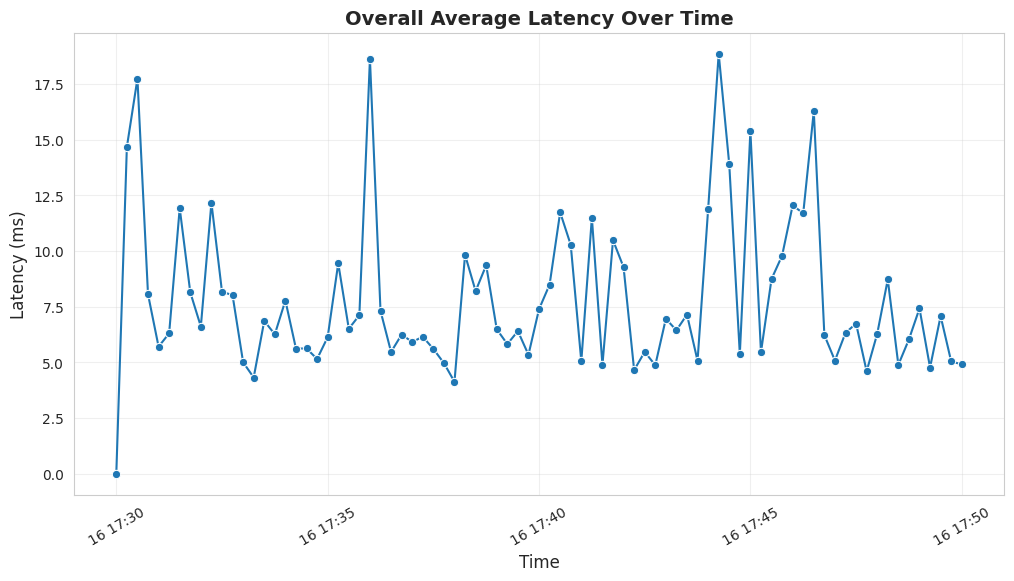

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('kiali_kpi_metrics.csv')

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Filter out missing or zero latency values (optional)
df = df[df['average_latency'].notna()]

# Group by timestamp and calculate the overall mean latency
grouped_df = df.groupby('timestamp')['average_latency'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(data=grouped_df, x='timestamp', y='average_latency', marker='o', color='tab:blue')

# Formatting
plt.title('Overall Average Latency Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Latency (ms)', fontsize=12)
plt.xticks(rotation=30)
plt.grid(True, alpha=0.3)

# Show the graph
plt.show()

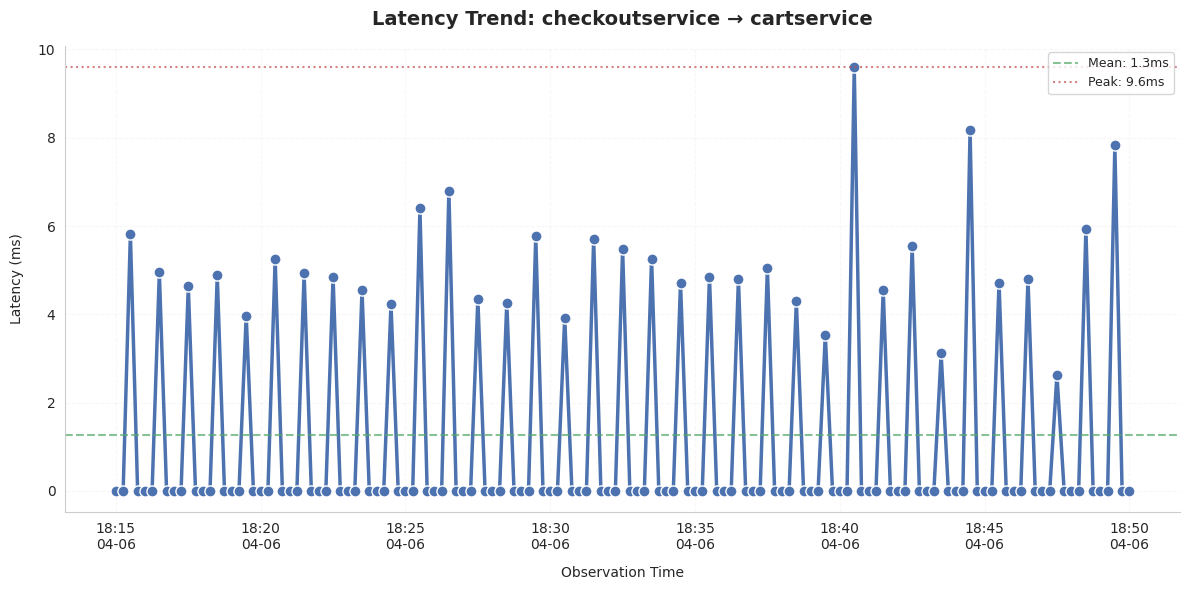

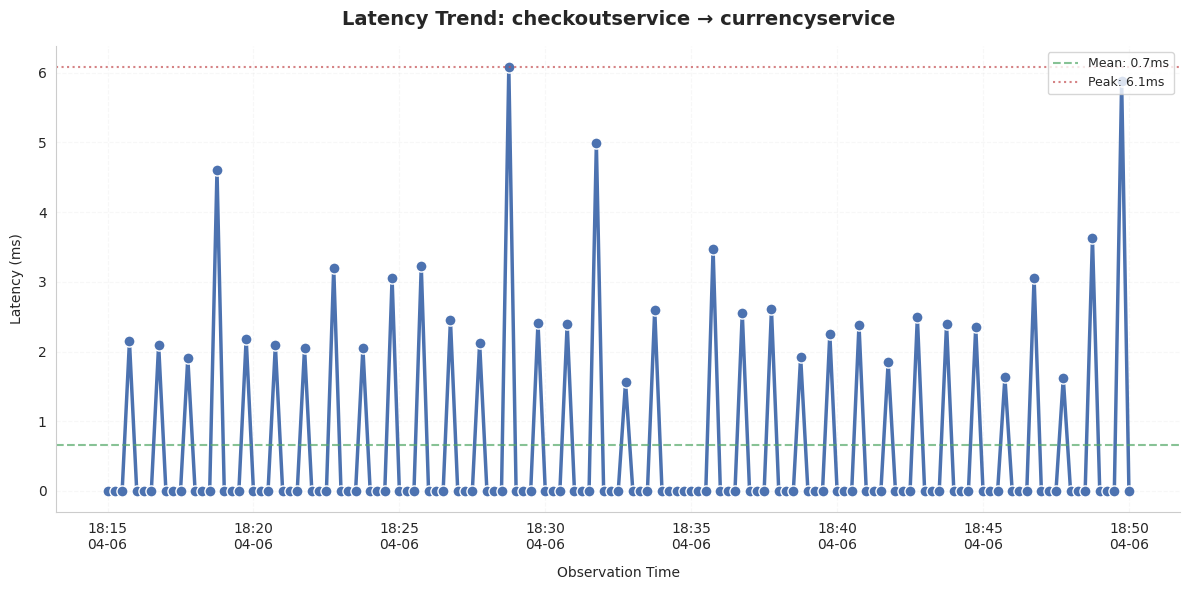

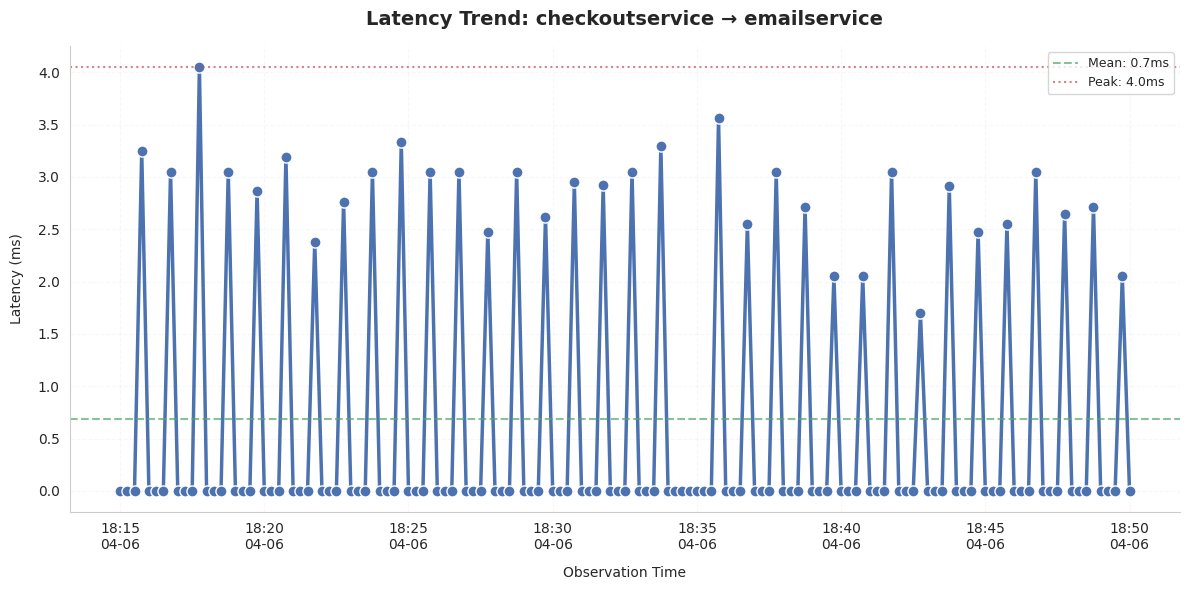

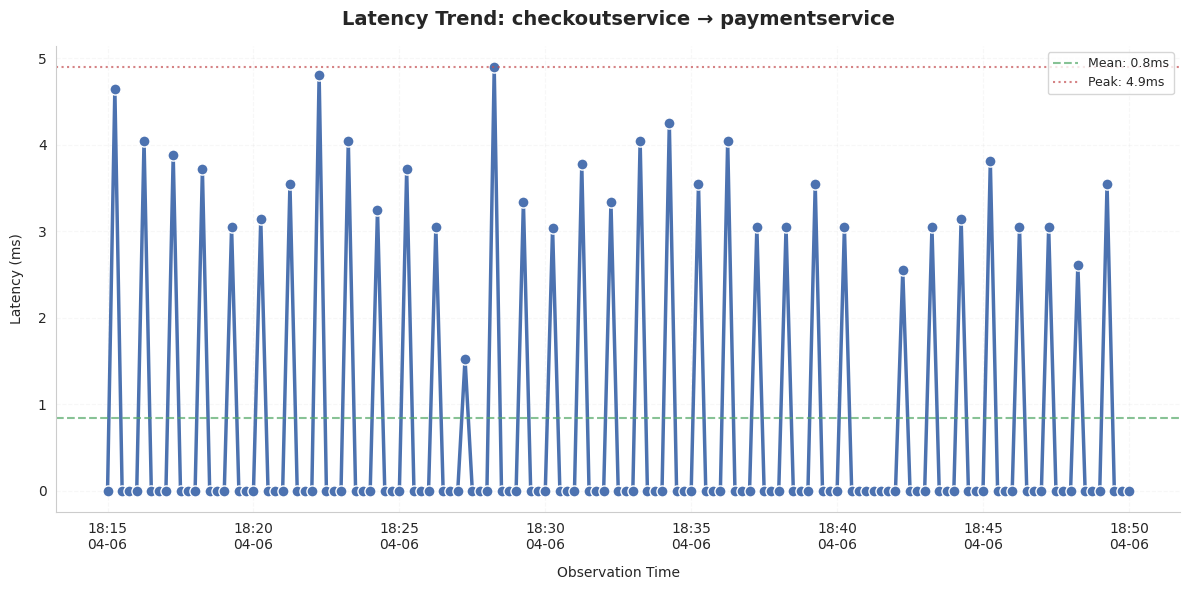

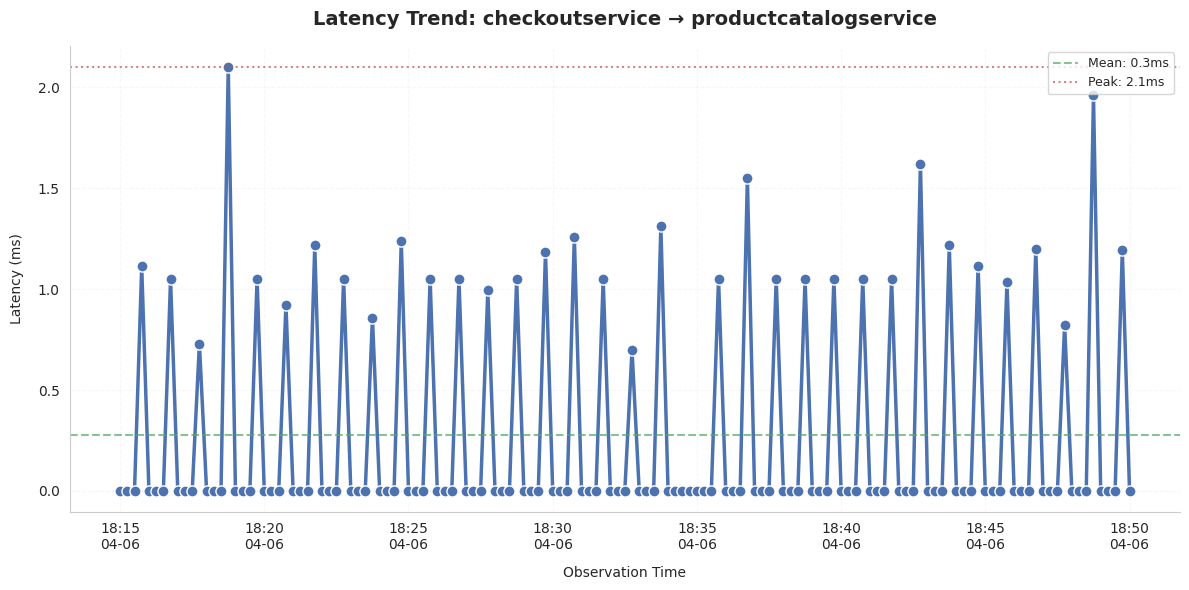

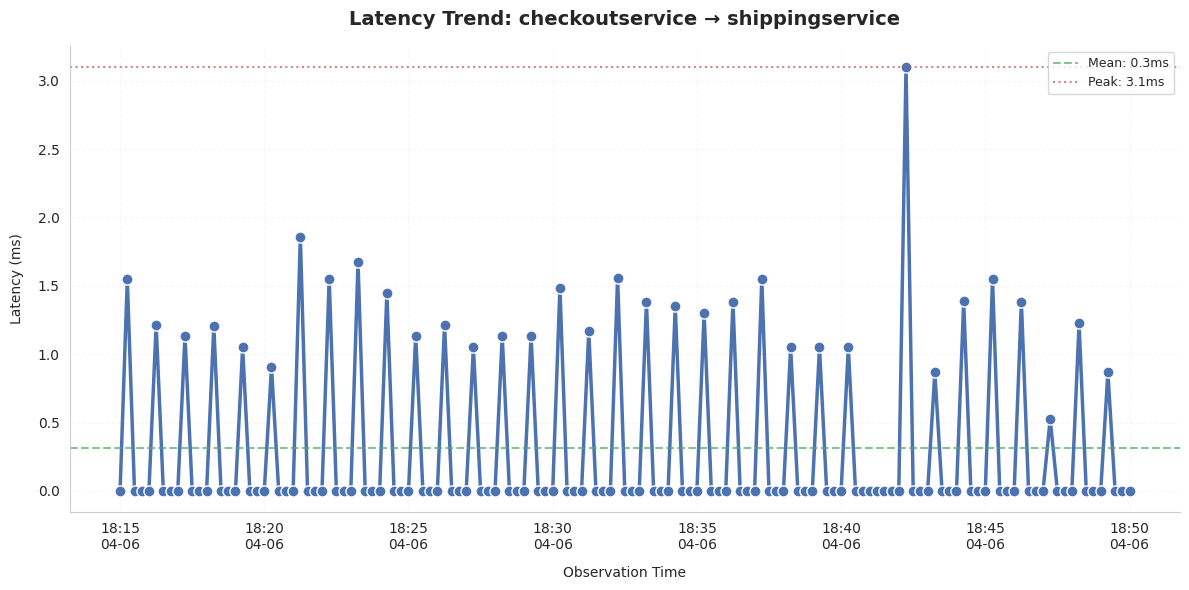

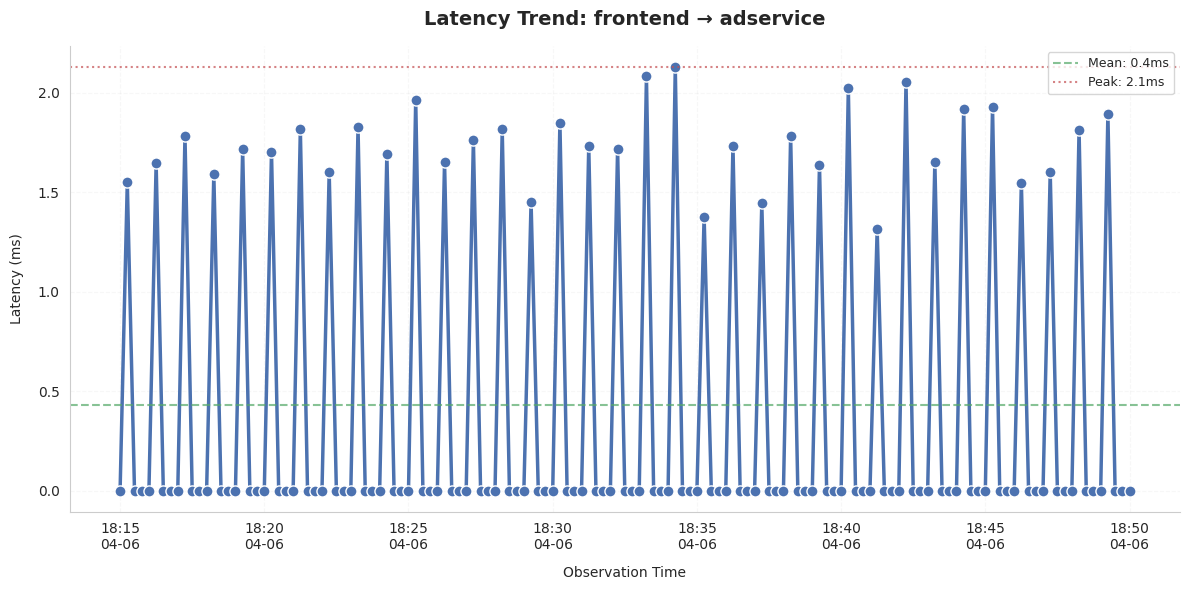

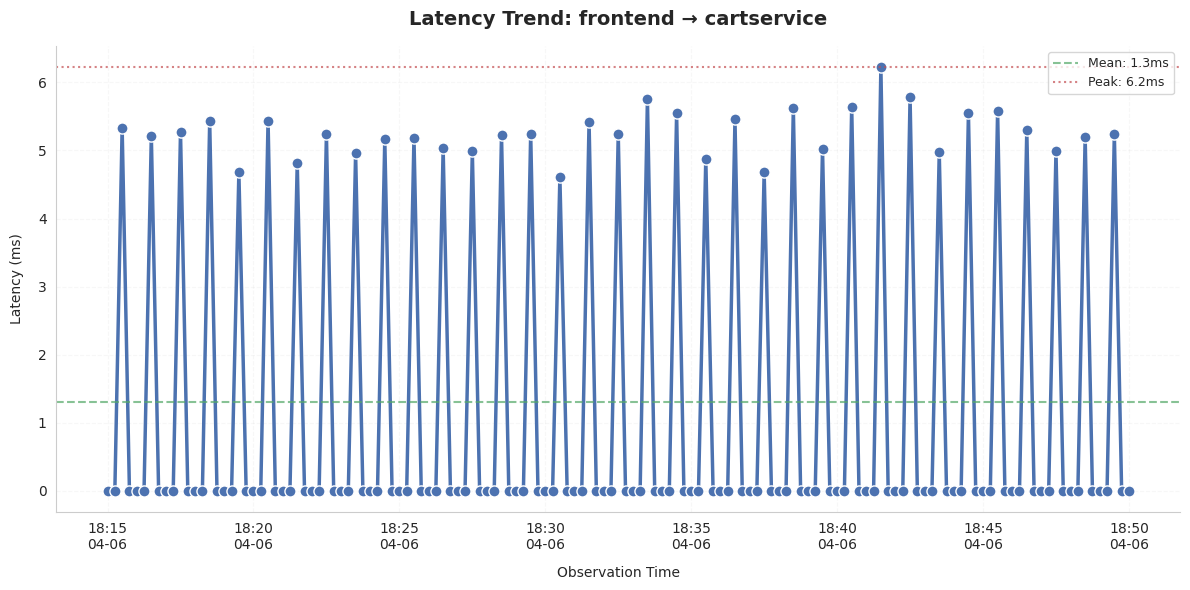

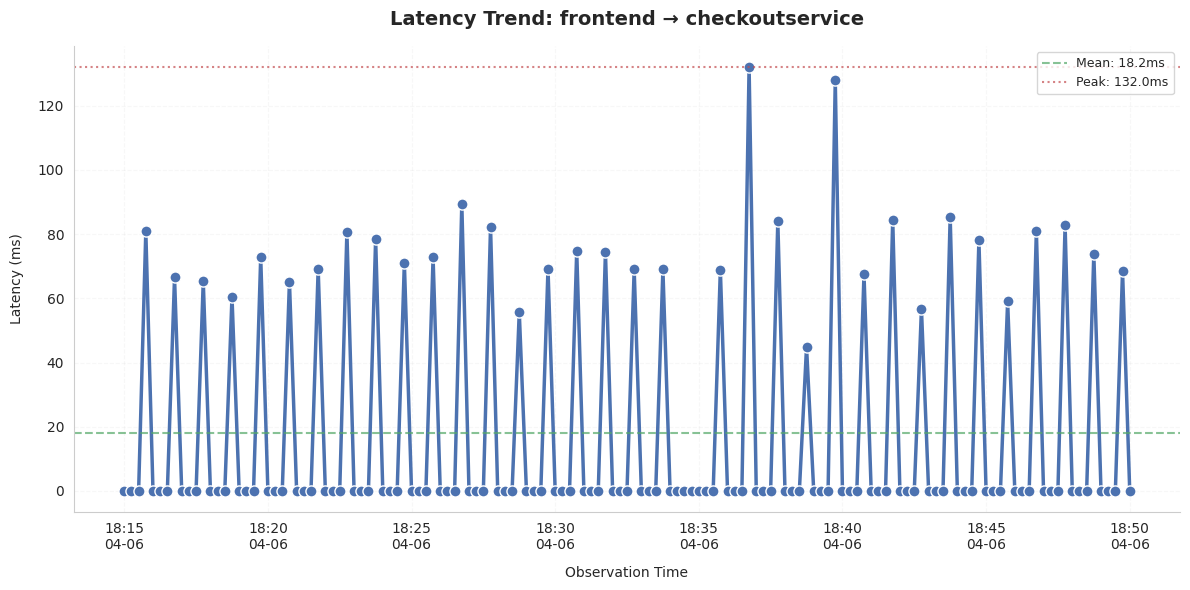

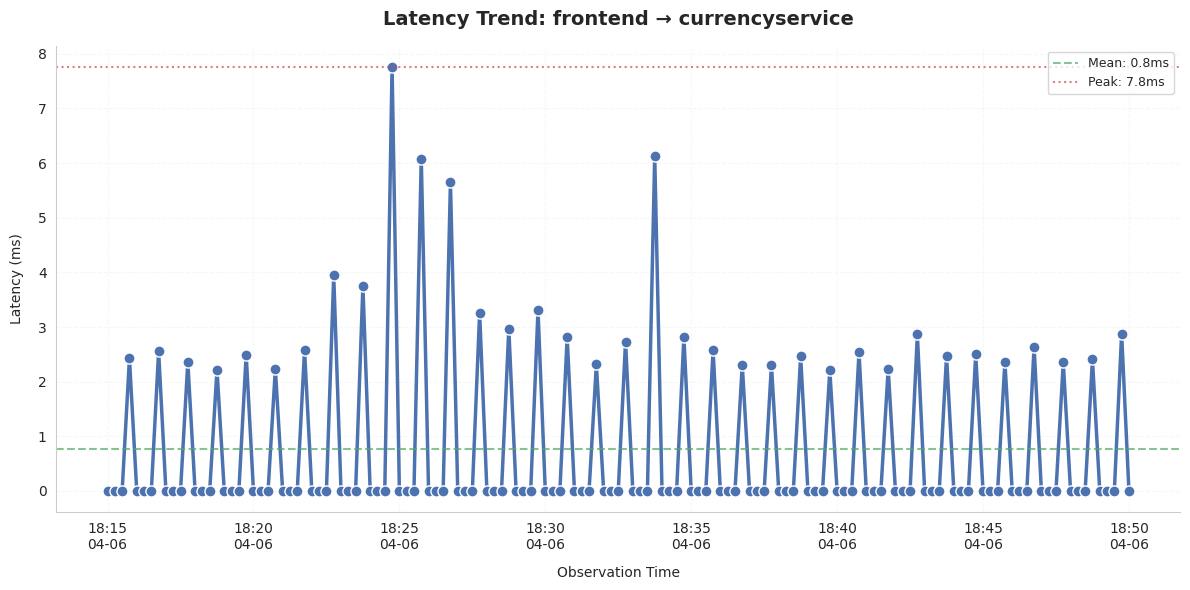

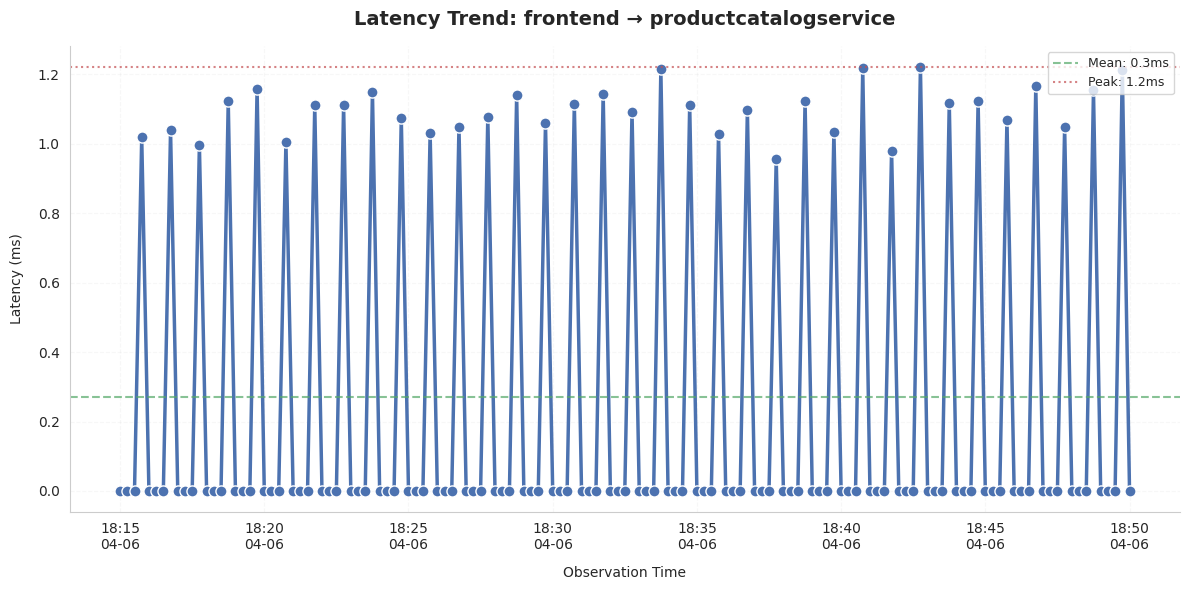

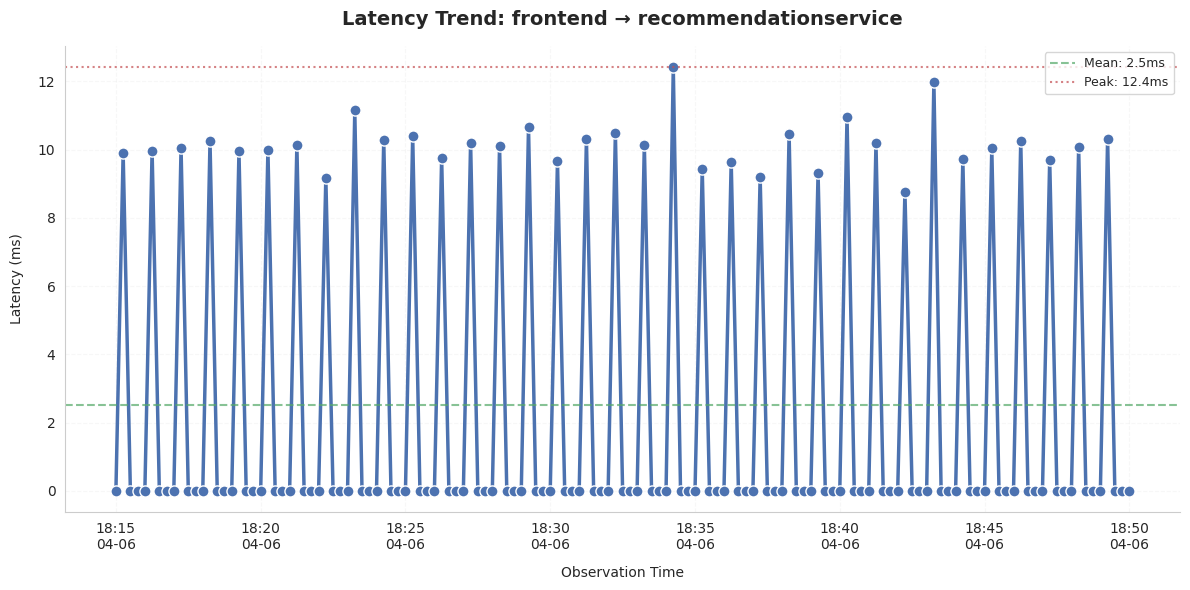

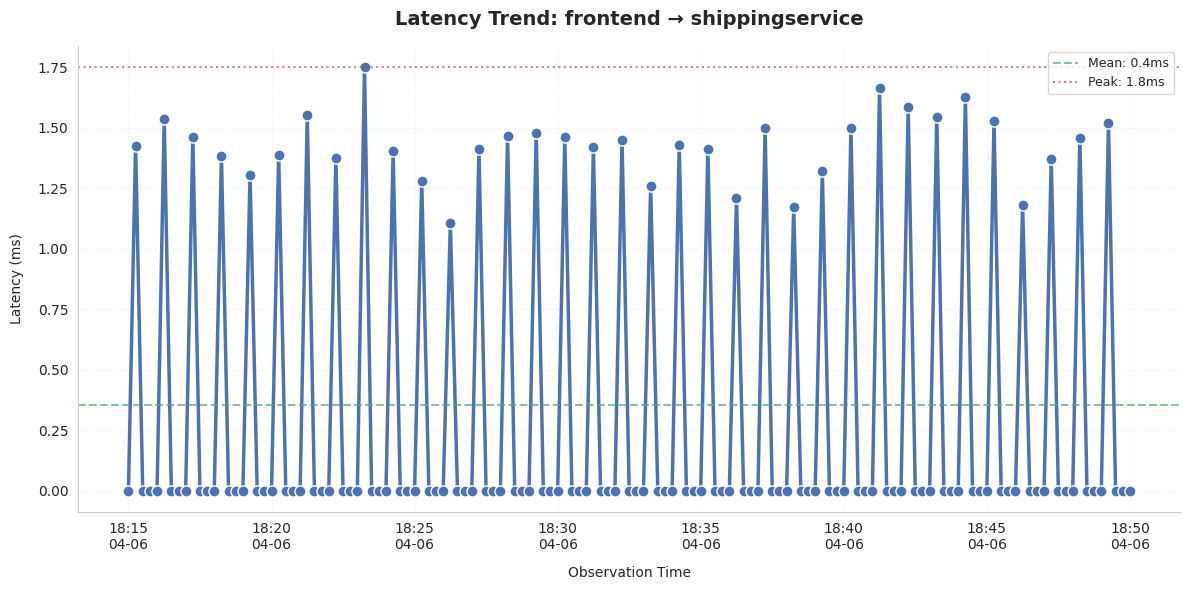

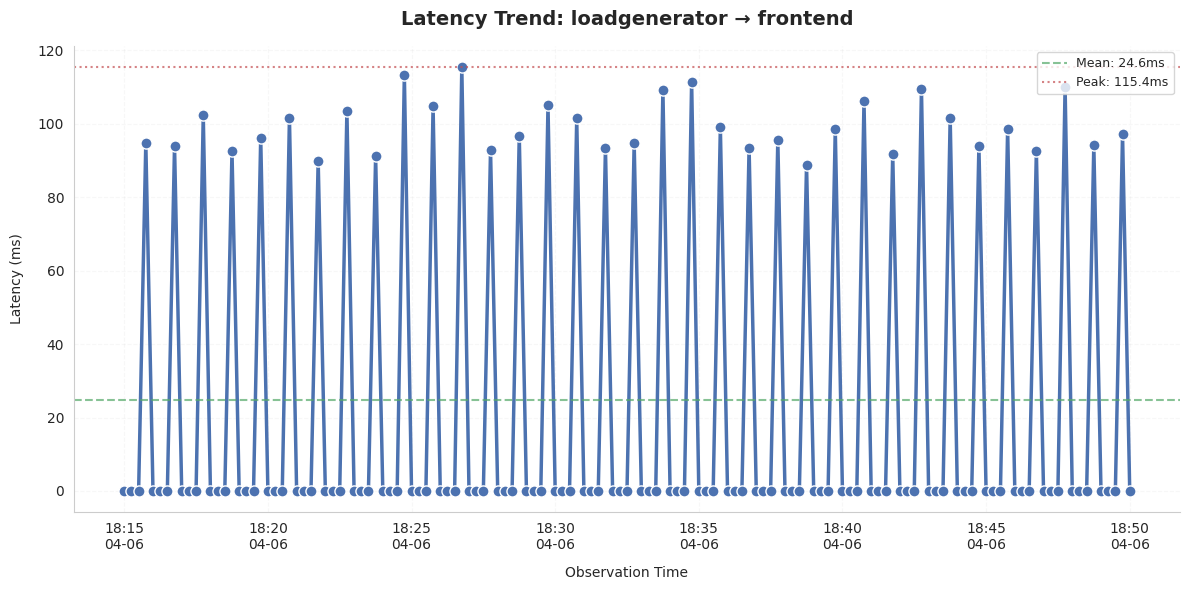

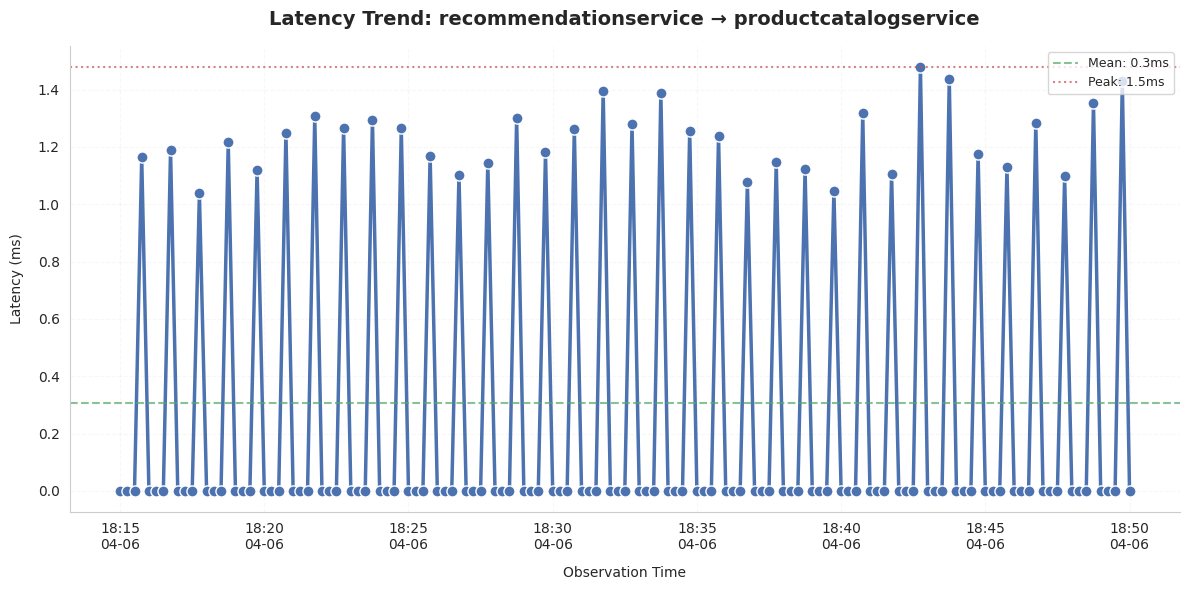

Created and displayed 15 individual latency plots.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates

def plot_individual_latency_graphs(file_path='kiali_kpi_metrics.csv'):
    """Create and display separate latency graphs for each service pair."""
    
    # 1. Load and prepare data
    df = pd.read_csv(file_path)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['communication_pair'] = df['source_workload'] + " → " + df['destination_workload']
    
    # 2. Get unique communication pairs
    pairs = df['communication_pair'].unique()
    
    # 3. Setup consistent visual style
    sns.set_style("whitegrid")
    plt.rcParams.update({
        'font.size': 10,
        'axes.titlesize': 14,
        'axes.titleweight': 'bold',
        'axes.labelpad': 8,
        'grid.alpha': 0.2,
        'legend.fontsize': 9
    })
    
    # 4. Create and display individual plots
    for pair in pairs:
        # Filter data for this pair
        pair_data = df[df['communication_pair'] == pair]
        
        # Create figure
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # 5. Enhanced line plot
        sns.lineplot(
            data=pair_data,
            x='timestamp',
            y='average_latency',
            color='#4C72B0',
            linewidth=2.5,
            marker='o',
            markersize=8,
            markeredgecolor='white',
            markeredgewidth=1,
            ax=ax
        )
        
        # 6. Customize time axis
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m-%d'))
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        
        # 7. Add analytical elements
        mean_latency = pair_data['average_latency'].mean()
        max_latency = pair_data['average_latency'].max()
        
        ax.axhline(mean_latency, color='#55A868', linestyle='--', alpha=0.7, 
                  label=f'Mean: {mean_latency:.1f}ms')
        ax.axhline(max_latency, color='#C44E52', linestyle=':', alpha=0.7, 
                  label=f'Peak: {max_latency:.1f}ms')
        
        # 8. Customize plot appearance
        ax.set_title(f'Latency Trend: {pair}', pad=15)
        ax.set_xlabel('Observation Time', labelpad=10)
        ax.set_ylabel('Latency (ms)', labelpad=10)
        ax.grid(True, which='major', axis='both', linestyle='--', alpha=0.15)
        ax.legend(loc='upper right')
        
        # 9. Remove unnecessary spines
        for spine in ['top', 'right']:
            ax.spines[spine].set_visible(False)
        
        # 10. Save and display
        plt.tight_layout()
        safe_filename = pair.replace(' → ', '_to_').replace(' ', '_')
        plt.savefig(f'latency_{safe_filename}.png', dpi=300, bbox_inches='tight')
        plt.show()  # Display the plot
        plt.close()  # Then close it
        
    print(f"Created and displayed {len(pairs)} individual latency plots.")

# Run the visualization
plot_individual_latency_graphs('kiali_kpi_metrics.csv')

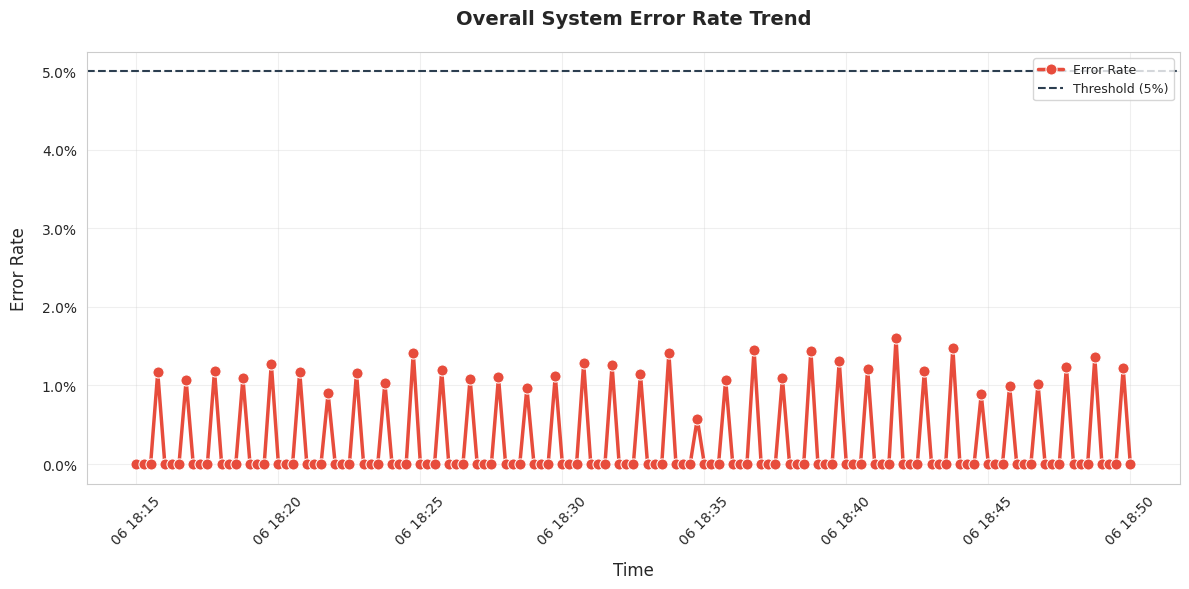

Average Error Rate: 0.29%
Peak Error Rate: 1.60%
Threshold Breaches: 0 occurrences


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Load and prepare data
df = pd.read_csv('kiali_kpi_metrics.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['error_rate'] = pd.to_numeric(df['error_rate'], errors='coerce').fillna(0)

# Calculate overall error rate by time
overall_error = df.groupby('timestamp')['error_rate'].mean().reset_index()

# Create figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot overall error rate
sns.lineplot(data=overall_error,
             x='timestamp',
             y='error_rate',
             color='#e74c3c',  # Red for errors
             linewidth=2.5,
             marker='o',
             markersize=8,
             label='Error Rate')

# Formatting
plt.title('Overall System Error Rate Trend', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Time', fontsize=12, labelpad=10)
plt.ylabel('Error Rate', fontsize=12, labelpad=10)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # Show as percentage
plt.xticks(rotation=45)

# Add threshold line (5% by default)
threshold = 0.05
plt.axhline(threshold, color='#2c3e50', linestyle='--', 
            label=f'Threshold ({threshold:.0%})')

# Highlight spikes above threshold
spikes = overall_error[overall_error['error_rate'] > threshold]
if not spikes.empty:
    plt.scatter(spikes['timestamp'], spikes['error_rate'], 
               color='#c0392b', s=100, zorder=5,
               label='High Error Periods')

# Add legend and grid
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('overall_error_rate.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary stats
print(f"Average Error Rate: {overall_error['error_rate'].mean():.2%}")
print(f"Peak Error Rate: {overall_error['error_rate'].max():.2%}")
print(f"Threshold Breaches: {len(spikes)} occurrences")

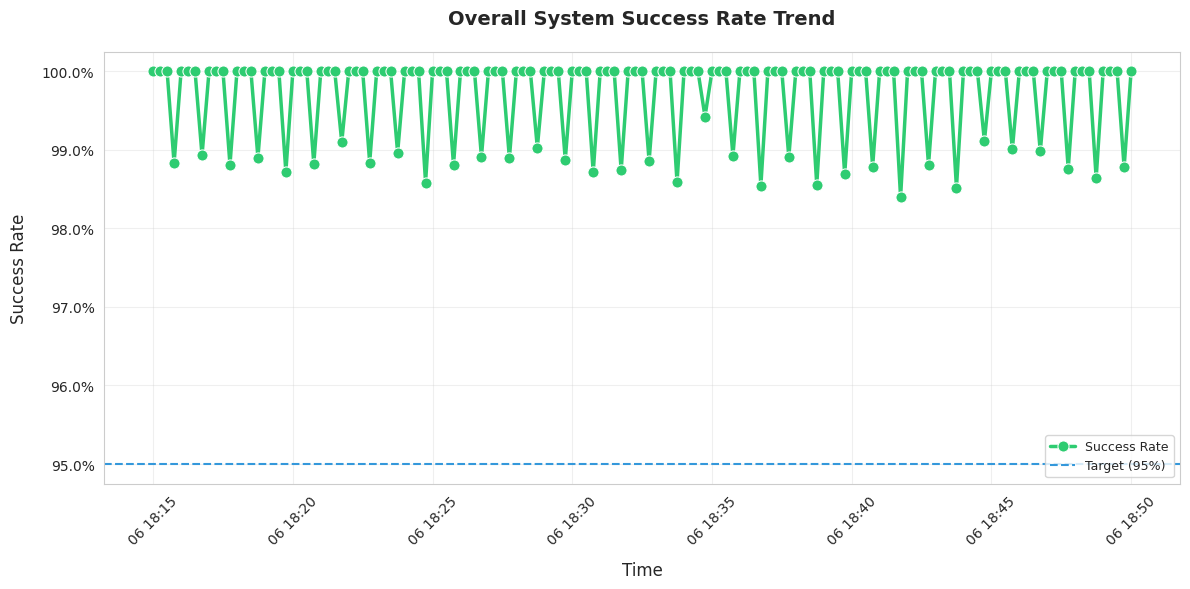

Average Success Rate: 99.71%
Minimum Success Rate: 98.40%
Target Misses: 0 occurrences


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# 1. Load and prepare data
df = pd.read_csv('kiali_kpi_metrics.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['success_rate'] = pd.to_numeric(df['success_rate'], errors='coerce').fillna(1)  # Default to 100% success if missing

# 2. Calculate overall success rate by time
overall_success = df.groupby('timestamp')['success_rate'].mean().reset_index()

# 3. Create figure
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# 4. Plot success rate - using green for positive metric
sns.lineplot(data=overall_success,
             x='timestamp',
             y='success_rate',
             color='#2ecc71',  # Positive green color
             linewidth=2.5,
             marker='o',
             markersize=8,
             label='Success Rate')

# 5. Formatting
plt.title('Overall System Success Rate Trend', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Time', fontsize=12, labelpad=10)
plt.ylabel('Success Rate', fontsize=12, labelpad=10)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # Show as percentage
plt.xticks(rotation=45)

# 6. Add target line (95% by default)
target = 0.95
plt.axhline(target, color='#3498db', linestyle='--', 
            label=f'Target ({target:.0%})')

# 7. Highlight dips below target
dips = overall_success[overall_success['success_rate'] < target]
if not dips.empty:
    plt.scatter(dips['timestamp'], dips['success_rate'], 
               color='#e74c3c', s=100, zorder=5,
               label='Low Success Periods')

# 8. Add legend and grid
plt.legend(loc='lower right')  # Moved to lower right for success metric
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('overall_success_rate.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. Print summary stats
print(f"Average Success Rate: {overall_success['success_rate'].mean():.2%}")
print(f"Minimum Success Rate: {overall_success['success_rate'].min():.2%}")
print(f"Target Misses: {len(dips)} occurrences")

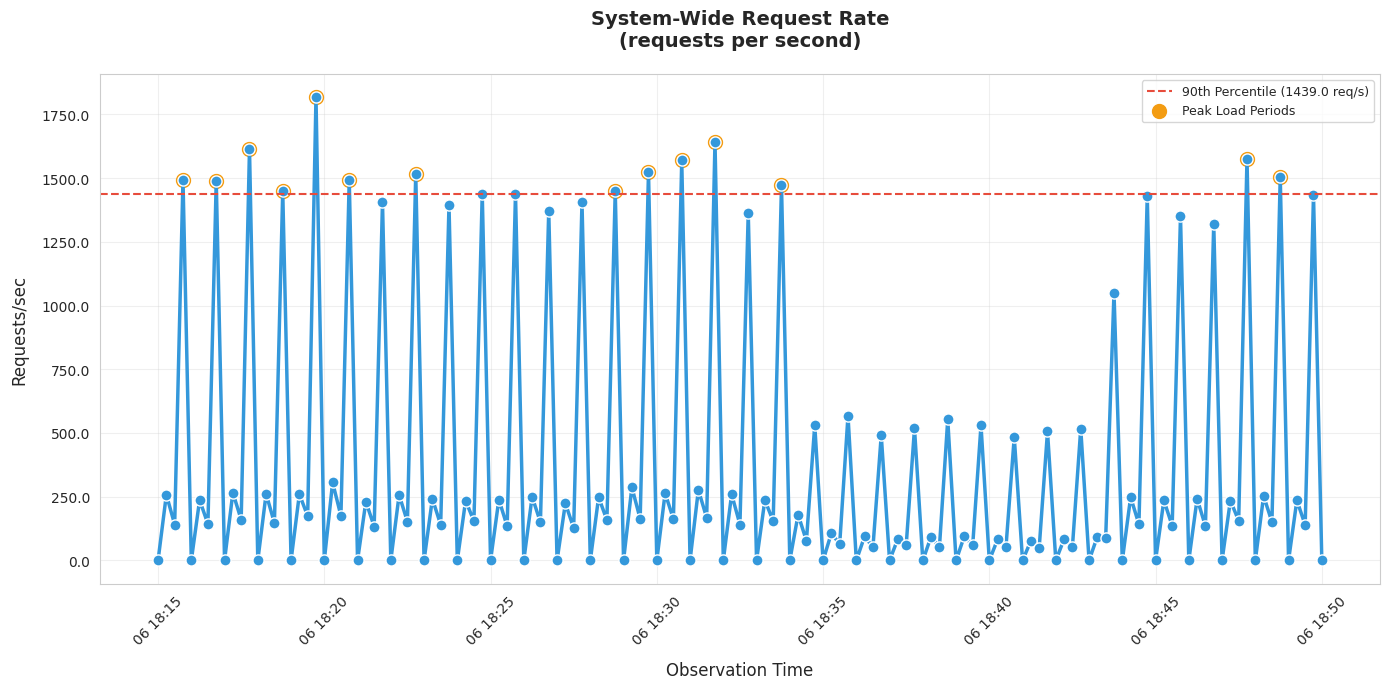


📊 Request Rate Statistics:
• Peak Throughput: 1818.0 req/s
• 90th Percentile: 1439.0 req/s
• Median Rate: 154.0 req/s
• Peak Events: 14 occurrences above threshold


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1. Load and prepare data
df = pd.read_csv('kiali_kpi_metrics.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Calculate TRUE system-wide request rate
system_throughput = (
    df.groupby('timestamp')['new_request']
    .sum()  # Sum all requests across services per timestamp
    #.div(15)  # Convert to requests/sec (since window=15S)
    .reset_index(name='requests_per_sec')
)

# 3. Create professional visualization
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Plot with enhanced styling
ax = sns.lineplot(
    data=system_throughput,
    x='timestamp',
    y='requests_per_sec',
    color='#3498db',  # Modern blue
    linewidth=2.5,
    marker='o',
    markersize=8,
    markeredgecolor='white',
    markeredgewidth=1
)

# Formatting
plt.title('System-Wide Request Rate\n(requests per second)', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Observation Time', fontsize=12, labelpad=10)
plt.ylabel('Requests/sec', fontsize=12, labelpad=10)
plt.xticks(rotation=45)

# Add dynamic thresholds (auto-calculates 90th percentile)
threshold = system_throughput['requests_per_sec'].quantile(0.9)
ax.axhline(threshold, color='#e74c3c', linestyle='--', 
           label=f'90th Percentile ({threshold:.1f} req/s)')

# Highlight peaks
peaks = system_throughput[system_throughput['requests_per_sec'] > threshold]
if not peaks.empty:
    ax.scatter(peaks['timestamp'], peaks['requests_per_sec'],
              color='#f39c12', s=100, label='Peak Load Periods')

# Improve y-axis formatting
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))

# Legend and grid
ax.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 4. Save and show
plt.savefig('system_request_rate.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Print key statistics
stats = system_throughput['requests_per_sec'].describe(percentiles=[.25, .5, .75, .9])
print("\n📊 Request Rate Statistics:")
print(f"• Peak Throughput: {stats['max']:.1f} req/s")
print(f"• 90th Percentile: {stats['90%']:.1f} req/s")
print(f"• Median Rate: {stats['50%']:.1f} req/s")
print(f"• Peak Events: {len(peaks)} occurrences above threshold")

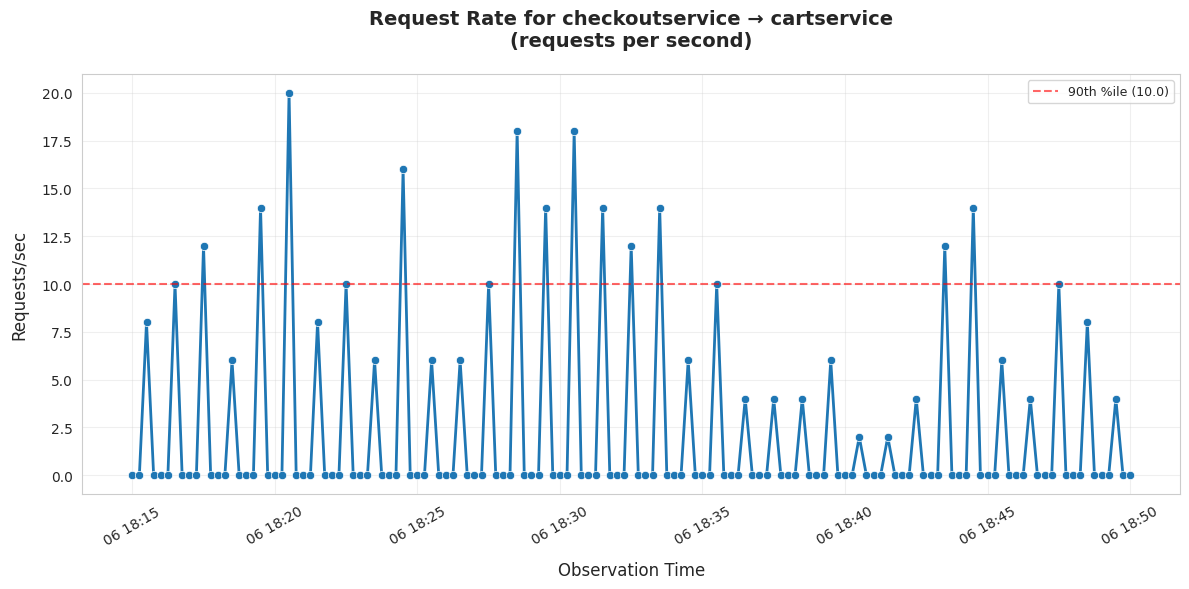

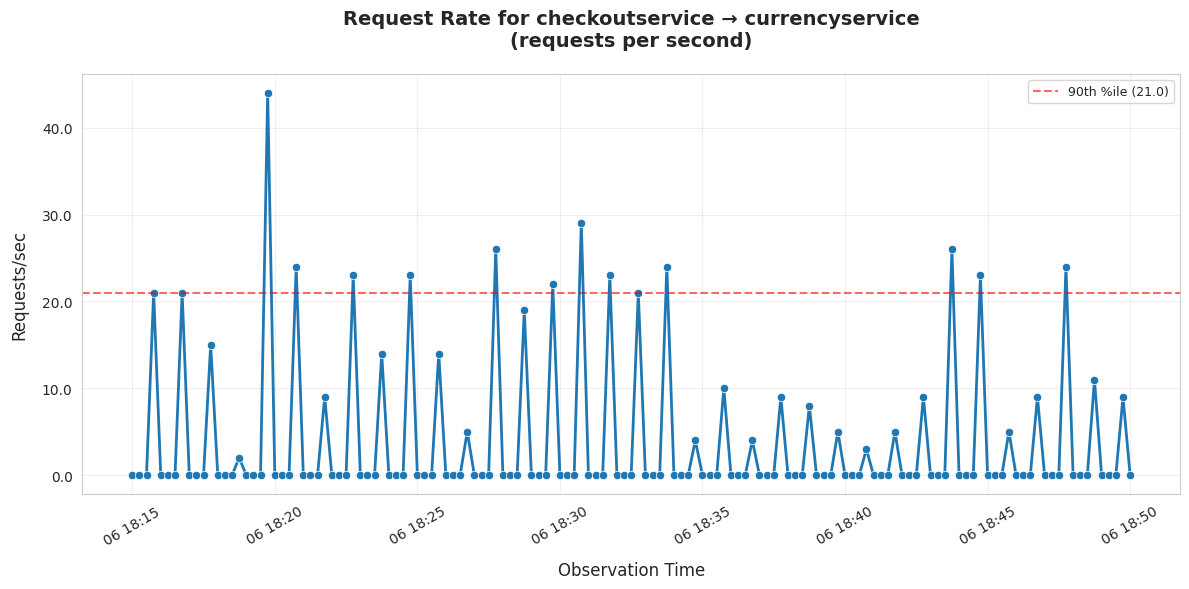

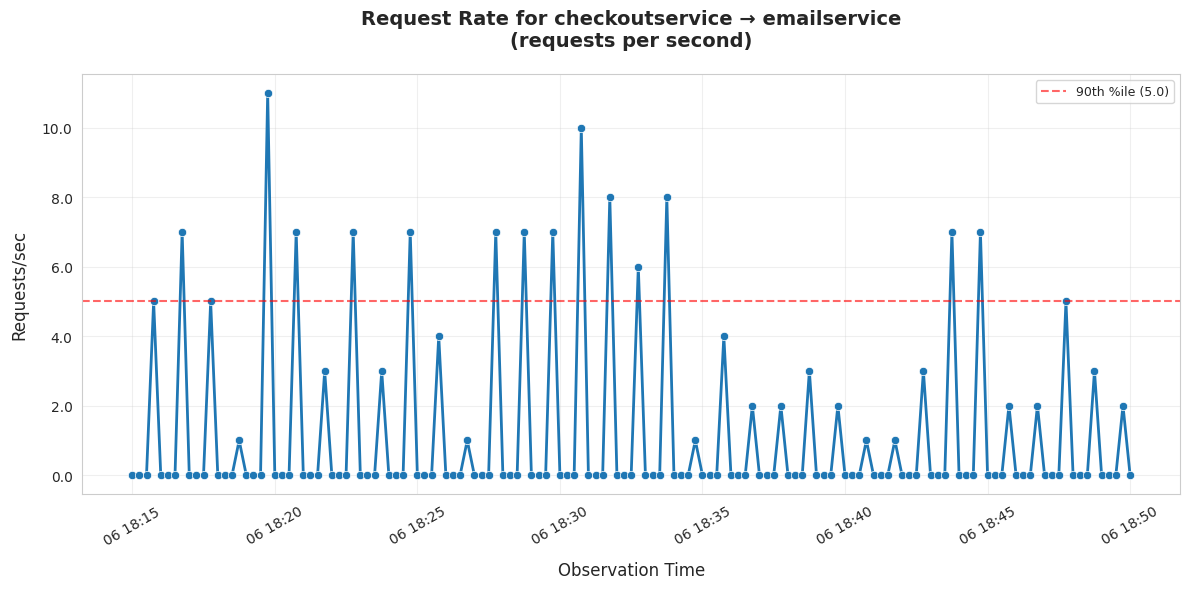

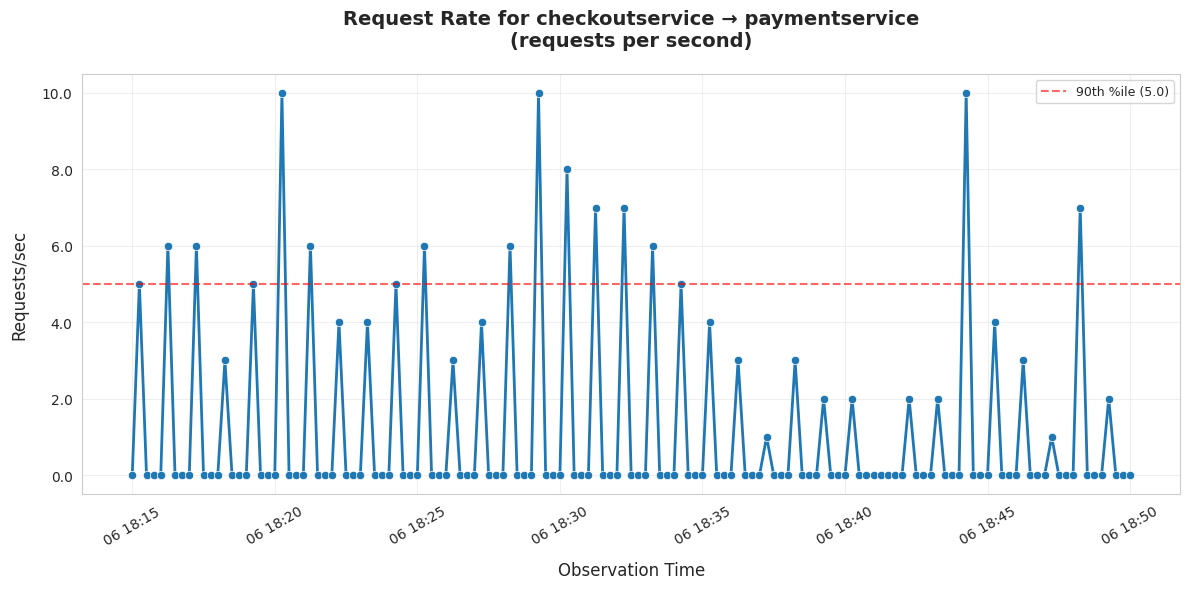

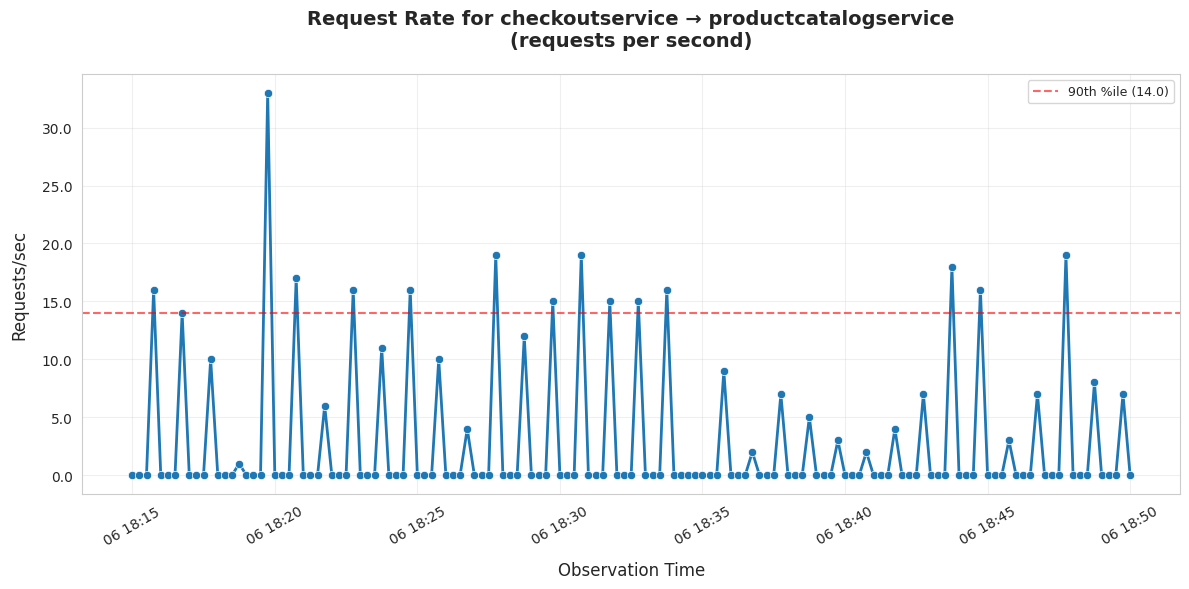

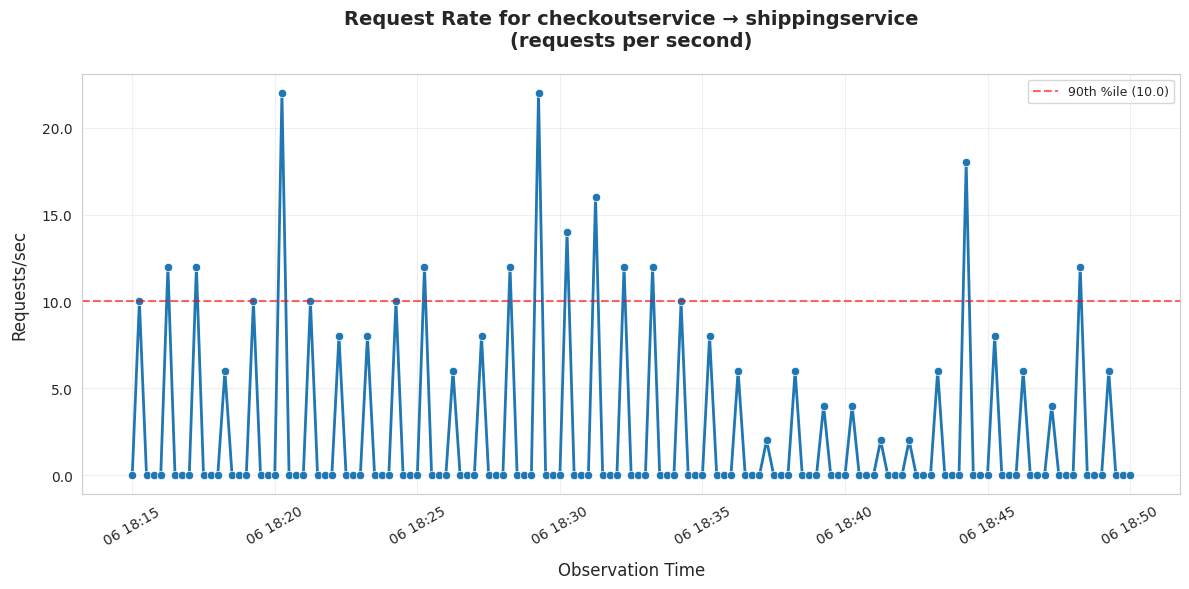

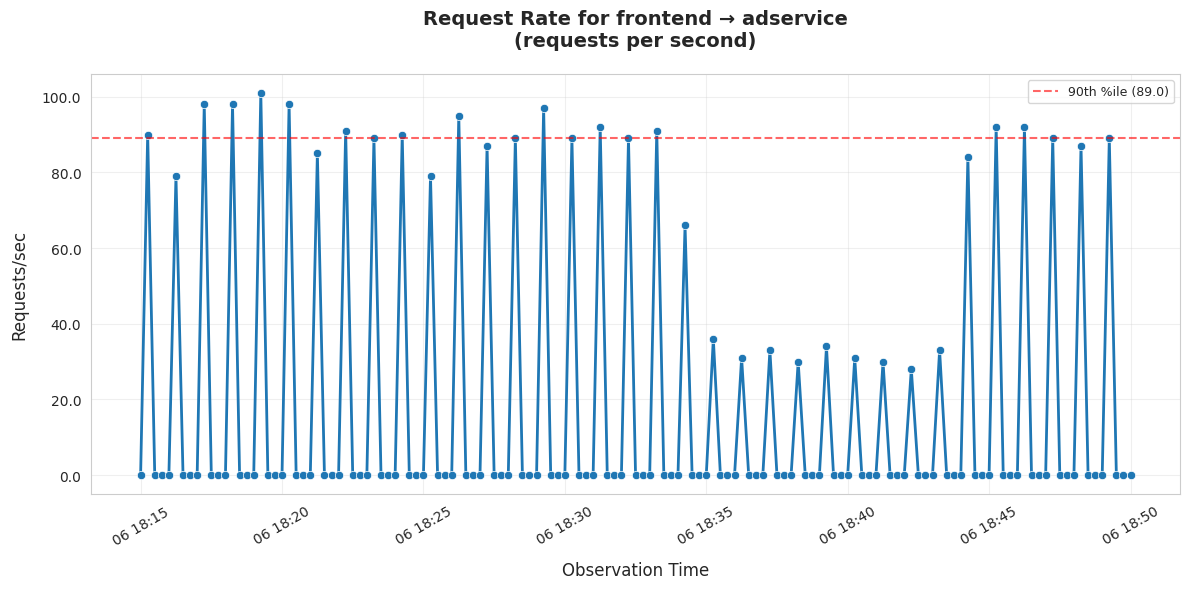

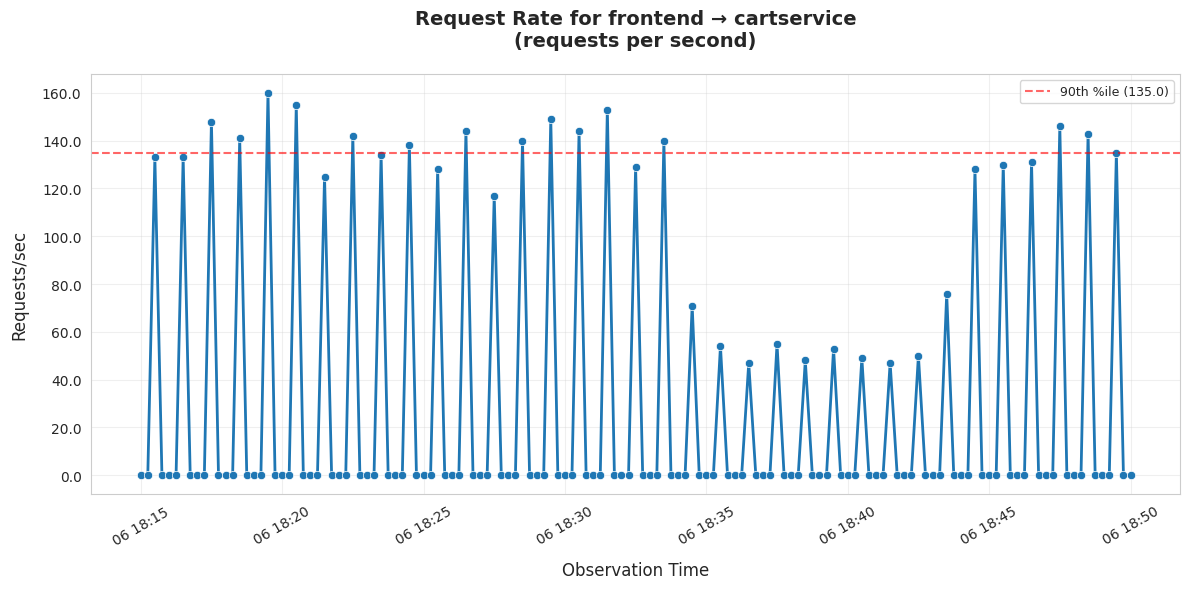

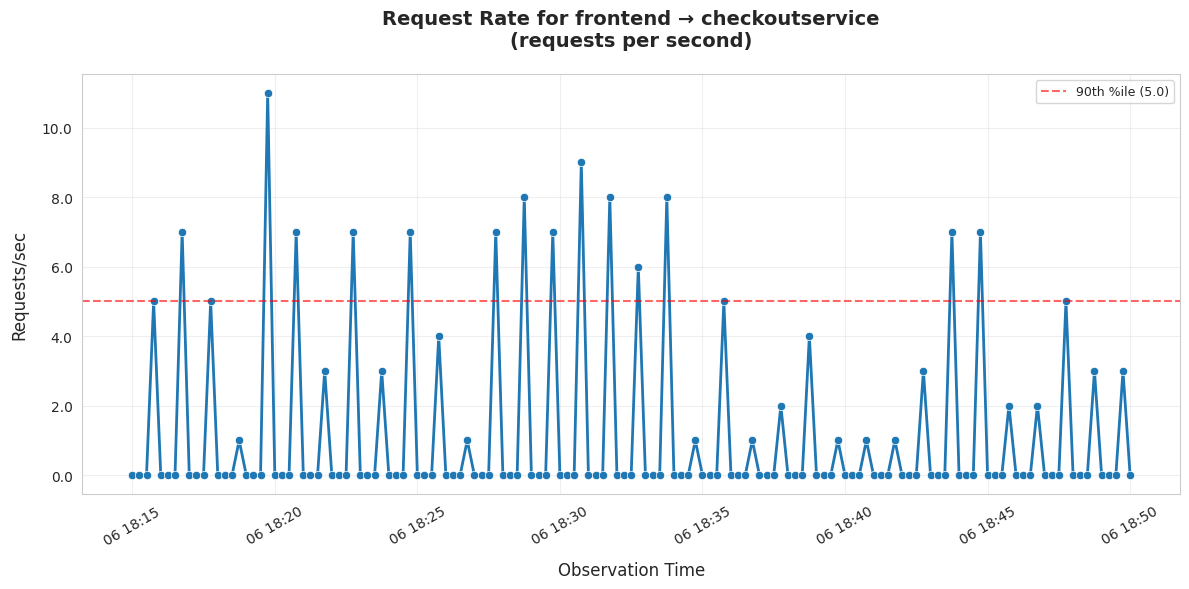

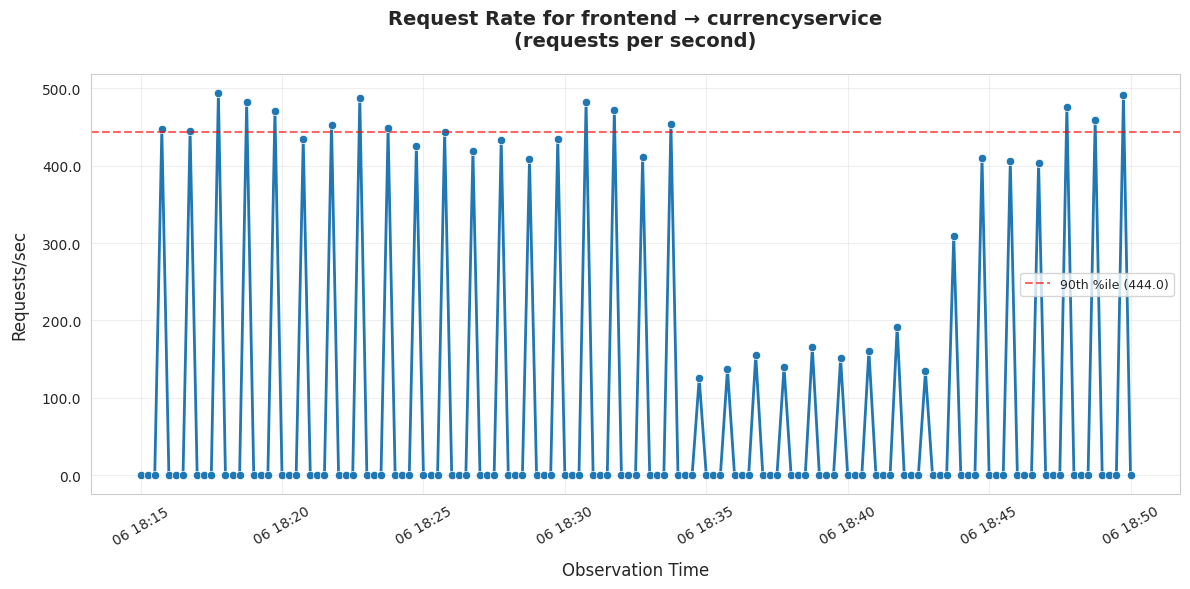

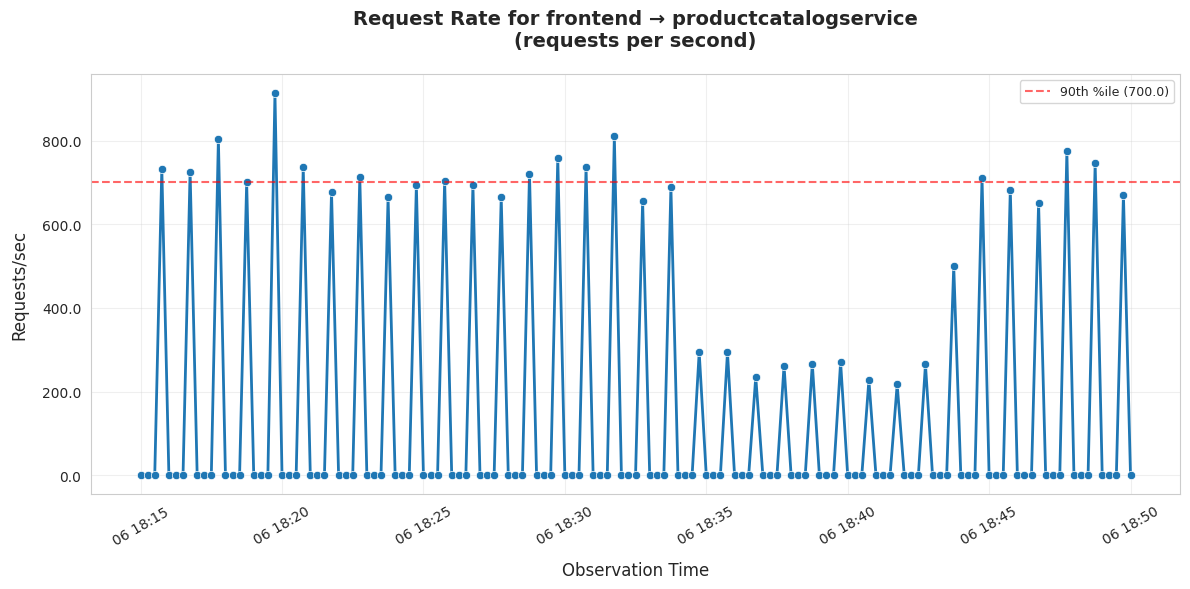

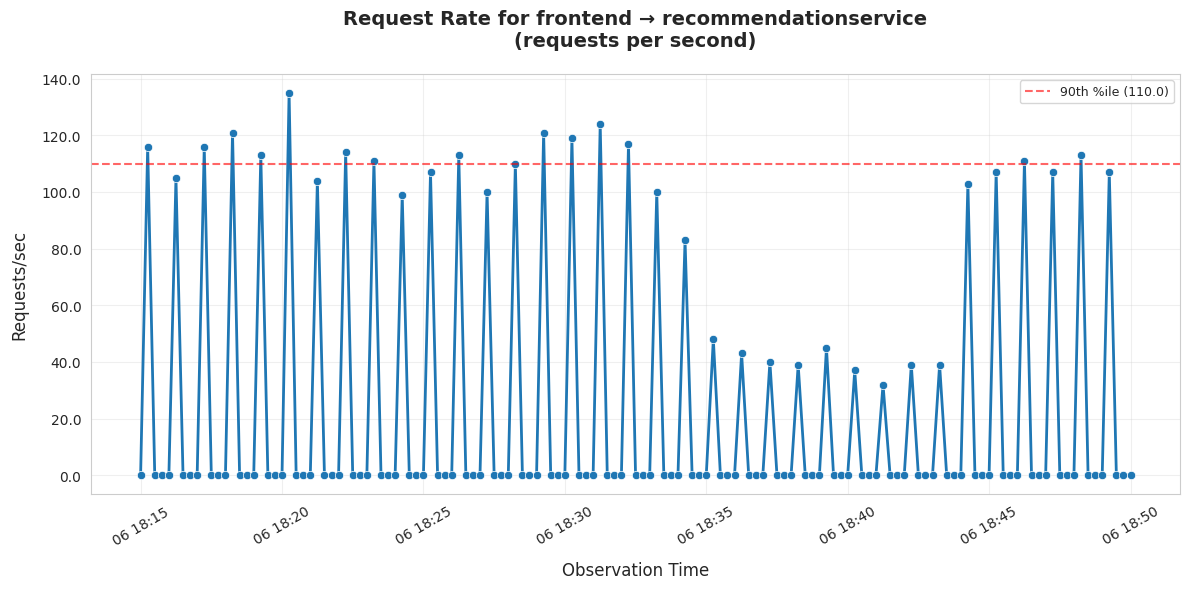

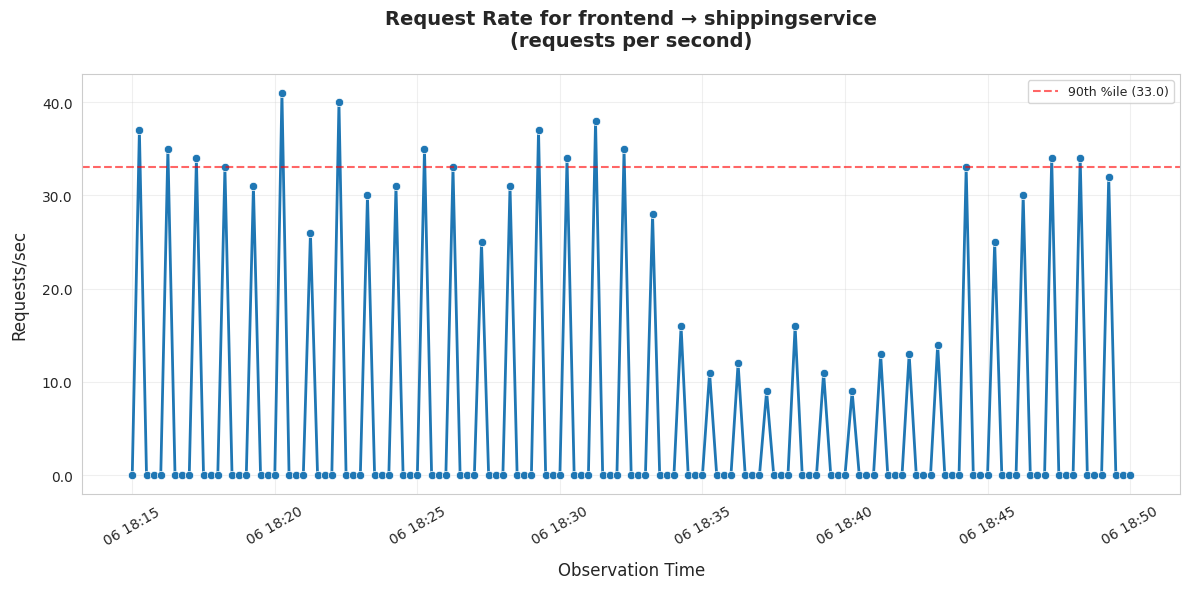

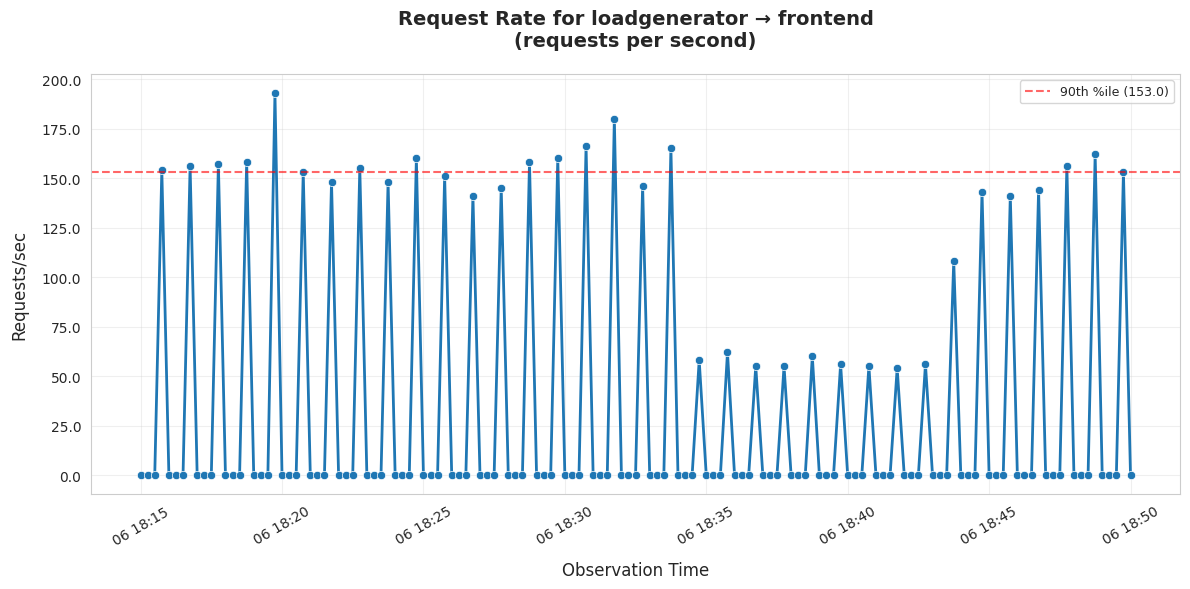

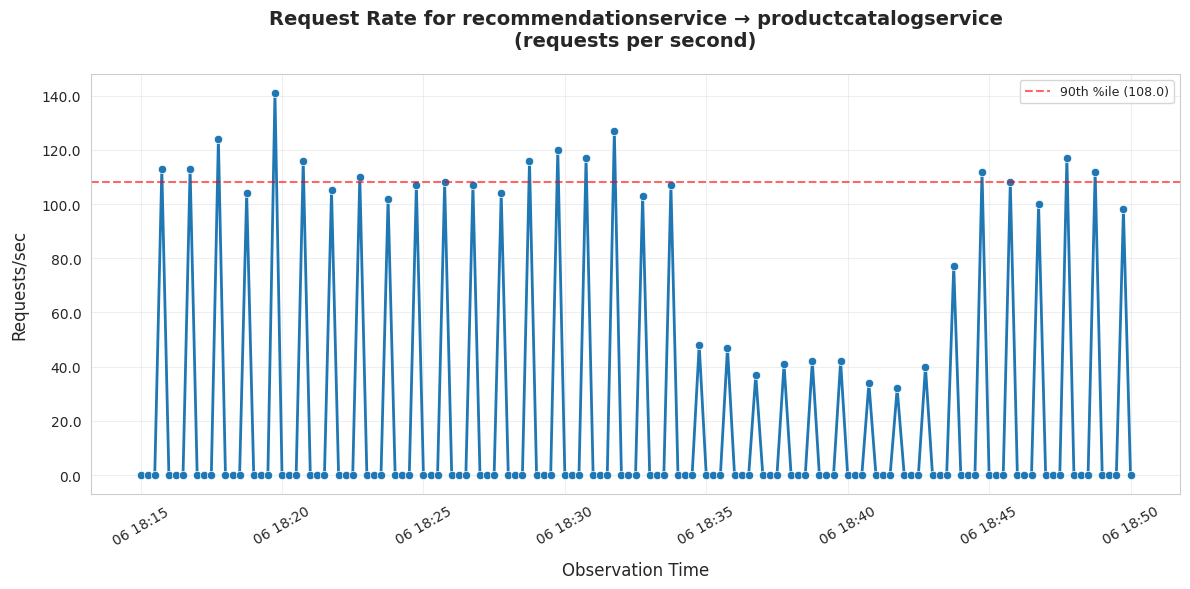


📊 Request Rate Statistics by Service Pair:
                                               count   mean  50%    90%    max
service_pair                                                                  
checkoutservice → cartservice                  141.0    2.3  0.0   10.0   20.0
checkoutservice → currencyservice              141.0    3.9  0.0   21.0   44.0
checkoutservice → emailservice                 141.0    1.1  0.0    5.0   11.0
checkoutservice → paymentservice               141.0    1.1  0.0    5.0   10.0
checkoutservice → productcatalogservice        141.0    2.7  0.0   14.0   33.0
checkoutservice → shippingservice              141.0    2.3  0.0   10.0   22.0
frontend → adservice                           141.0   18.5  0.0   89.0  101.0
frontend → cartservice                         141.0   28.5  0.0  135.0  160.0
frontend → checkoutservice                     141.0    1.1  0.0    5.0   11.0
frontend → currencyservice                     141.0   91.2  0.0  444.0  494.0
frontend

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1. Load and prepare data
df = pd.read_csv('kiali_kpi_metrics.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['service_pair'] = df['source_workload'] + " → " + df['destination_workload']

# 2. Calculate request rates per pair (requests per second)
pair_throughput = (
    df.groupby(['timestamp', 'service_pair'])['new_request']
    .sum()  # Sum requests per pair per timestamp
    .reset_index(name='requests_per_sec')  
)

# 3. Unique service pairs
service_pairs = pair_throughput['service_pair'].unique()

# 4. Generate separate plots
for pair in service_pairs:
    pair_data = pair_throughput[pair_throughput['service_pair'] == pair]

    # Set up figure
    plt.figure(figsize=(12, 6))
    sns.set_style("whitegrid")

    # Plot
    ax = sns.lineplot(
        data=pair_data,
        x='timestamp',
        y='requests_per_sec',
        linewidth=2,
        marker='o',
        markersize=6,
        markeredgecolor='white',
        markeredgewidth=0.5,
        color='tab:blue'
    )

    # 5. Add threshold (90th percentile)
    threshold = pair_data['requests_per_sec'].quantile(0.9)
    ax.axhline(y=threshold, color='red', linestyle='--', alpha=0.6, label=f'90th %ile ({threshold:.1f})')

    # Formatting
    plt.title(f'Request Rate for {pair}\n(requests per second)', fontsize=14, pad=20, fontweight='bold')
    plt.xlabel('Observation Time', fontsize=12, labelpad=10)
    plt.ylabel('Requests/sec', fontsize=12, labelpad=10)
    plt.xticks(rotation=30)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.1f}'))
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()

    # Save each graph separately
    plt.savefig(f'request_rate_{pair.replace(" → ", "_")}.png', dpi=300, bbox_inches='tight')
    plt.show()

# 6. Print key statistics
print("\n📊 Request Rate Statistics by Service Pair:")
stats = pair_throughput.groupby('service_pair')['requests_per_sec'].describe(percentiles=[.5, .9])
print(stats[['count', 'mean', '50%', '90%', 'max']].round(1))

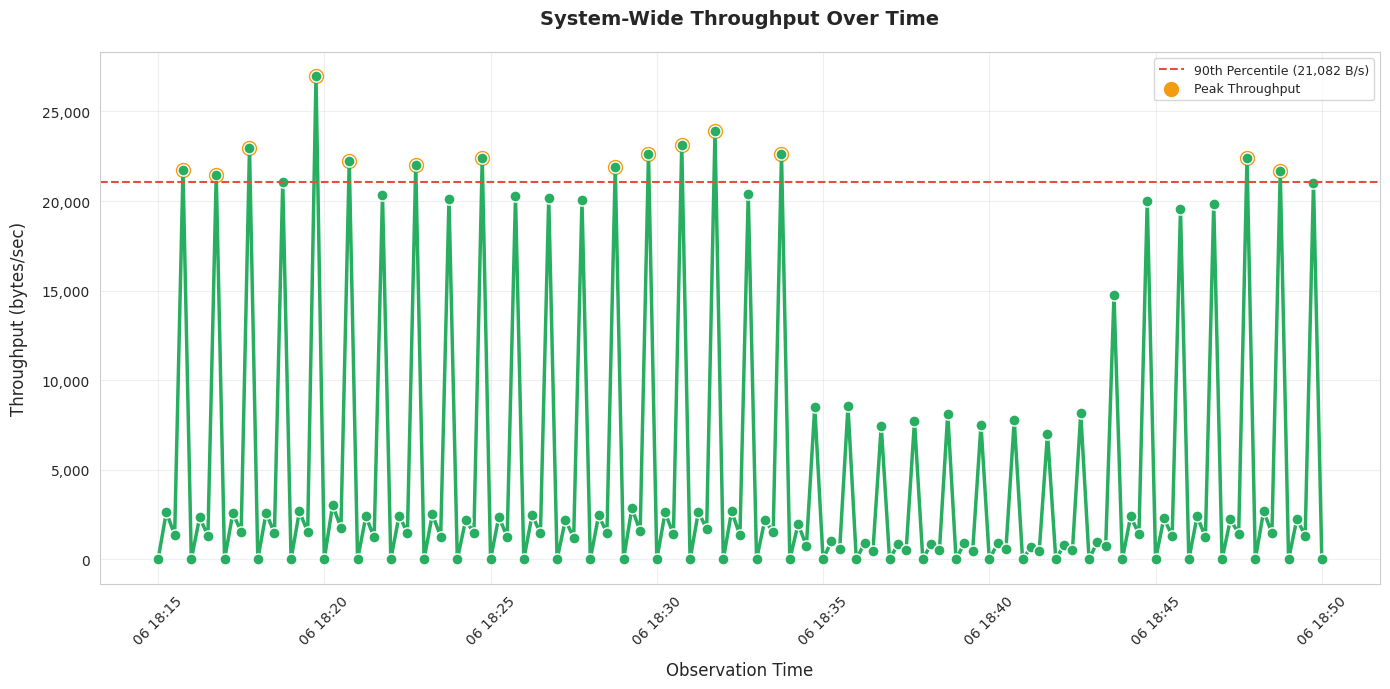


📊 Throughput Statistics:
• Peak Throughput: 26,980 B/s
• 90th Percentile: 21,082 B/s
• Median Throughput: 1,462 B/s
• Peak Events: 14 occurrences above threshold


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1. Load and prepare data
df = pd.read_csv('kiali_kpi_metrics.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 2. Calculate system-wide throughput (sum across all services)
system_throughput = (
    df.groupby('timestamp')['throughput']
    .sum()  # Sum throughput across all services
    .reset_index(name='total_throughput')
)

# 3. Create professional visualization
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

# Plot with enhanced styling
ax = sns.lineplot(
    data=system_throughput,
    x='timestamp',
    y='total_throughput',
    color='#27ae60',  # Professional green
    linewidth=2.5,
    marker='o',
    markersize=8,
    markeredgecolor='white',
    markeredgewidth=1
)

# Formatting
plt.title('System-Wide Throughput Over Time', 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Observation Time', fontsize=12, labelpad=10)
plt.ylabel('Throughput (bytes/sec)', fontsize=12, labelpad=10)
plt.xticks(rotation=45)

# Add dynamic threshold (90th percentile)
threshold = system_throughput['total_throughput'].quantile(0.9)
ax.axhline(threshold, color='#e74c3c', linestyle='--', 
           label=f'90th Percentile ({threshold:,.0f} B/s)')

# Highlight peaks
peaks = system_throughput[system_throughput['total_throughput'] > threshold]
if not peaks.empty:
    ax.scatter(peaks['timestamp'], peaks['total_throughput'],
              color='#f39c12', s=100, label='Peak Throughput')

# Format y-axis with thousands separators
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Legend and grid
ax.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# 4. Save and show
plt.savefig('system_throughput.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Print key statistics
stats = system_throughput['total_throughput'].describe(percentiles=[.25, .5, .75, .9])
print("\n📊 Throughput Statistics:")
print(f"• Peak Throughput: {stats['max']:,.0f} B/s")
print(f"• 90th Percentile: {stats['90%']:,.0f} B/s")
print(f"• Median Throughput: {stats['50%']:,.0f} B/s")
print(f"• Peak Events: {len(peaks)} occurrences above threshold")

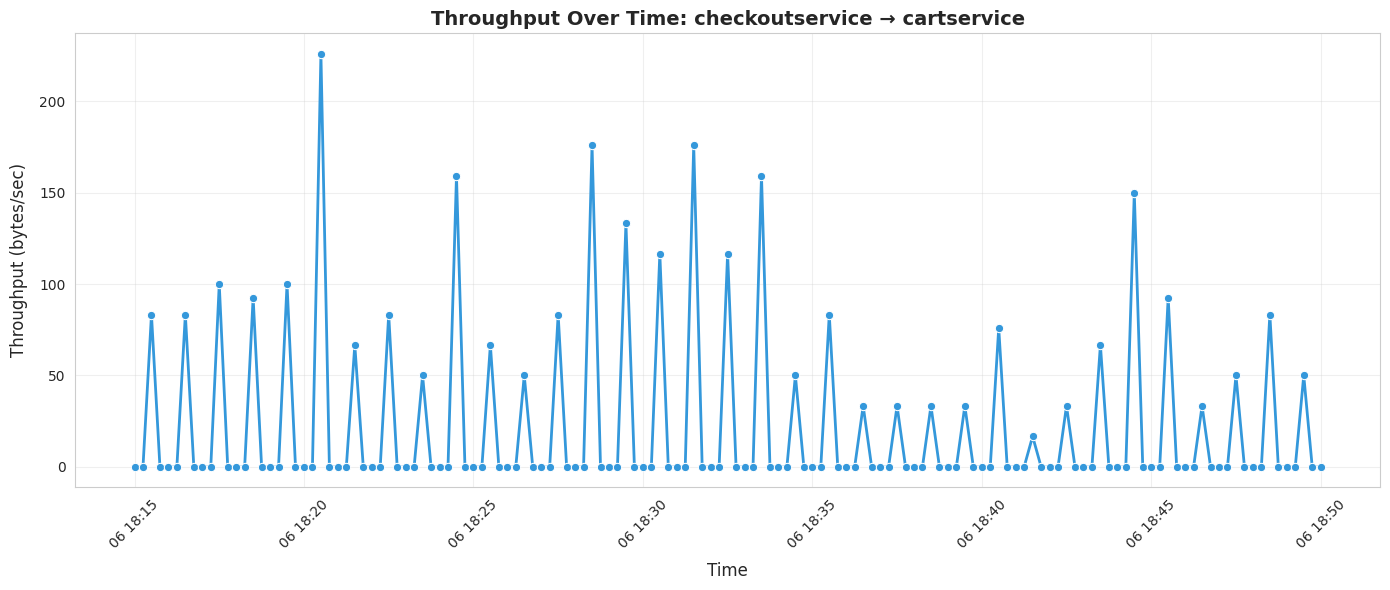

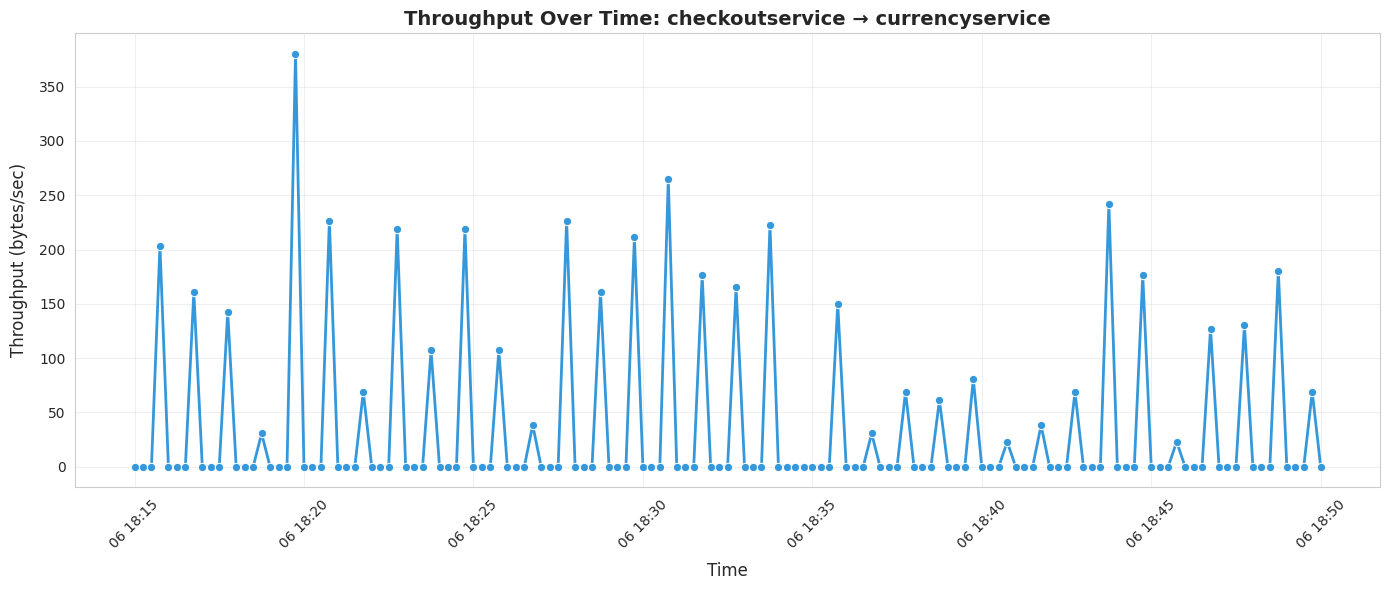

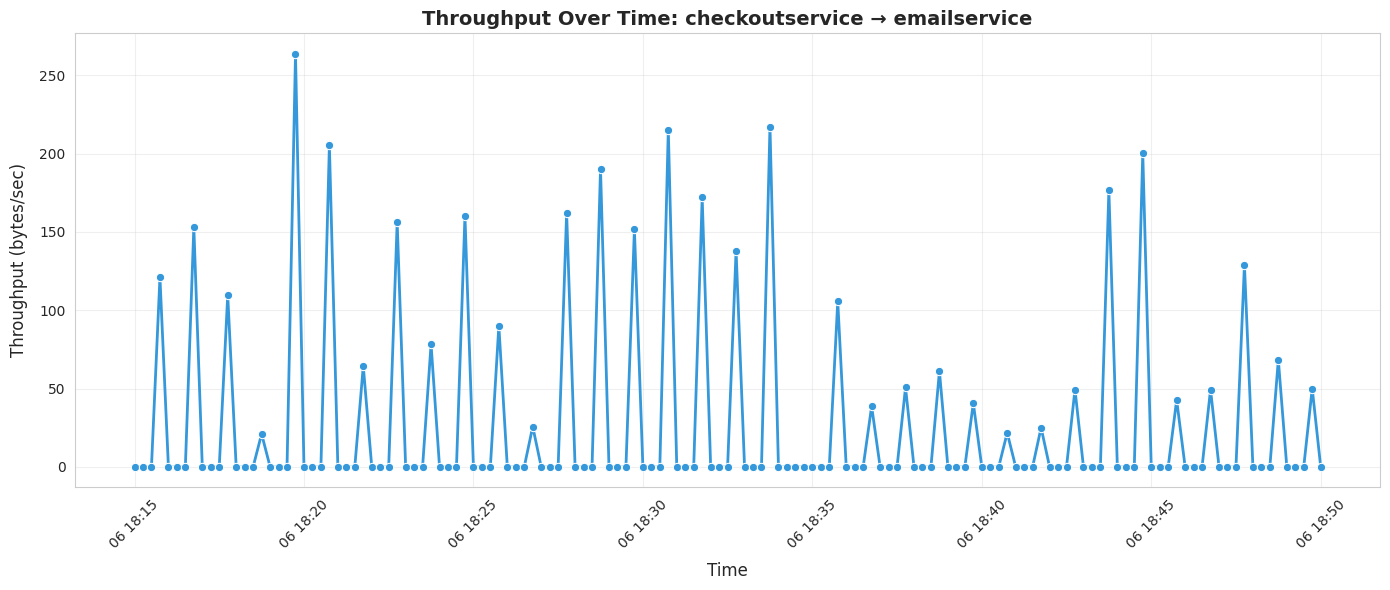

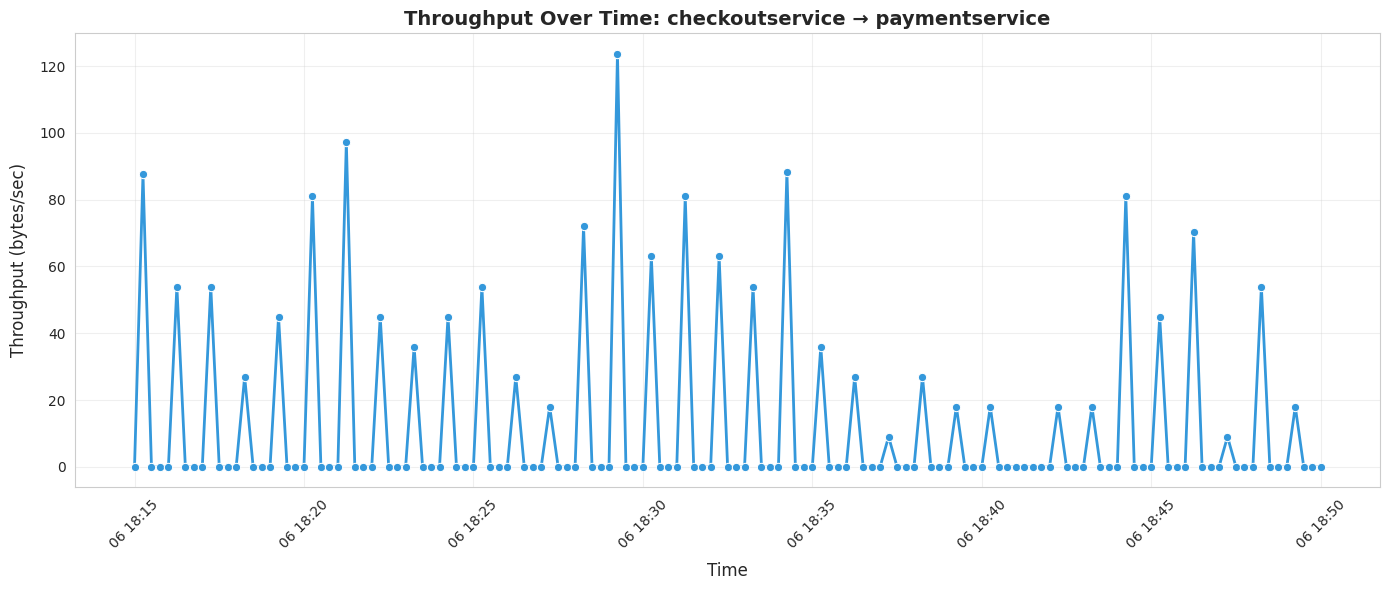

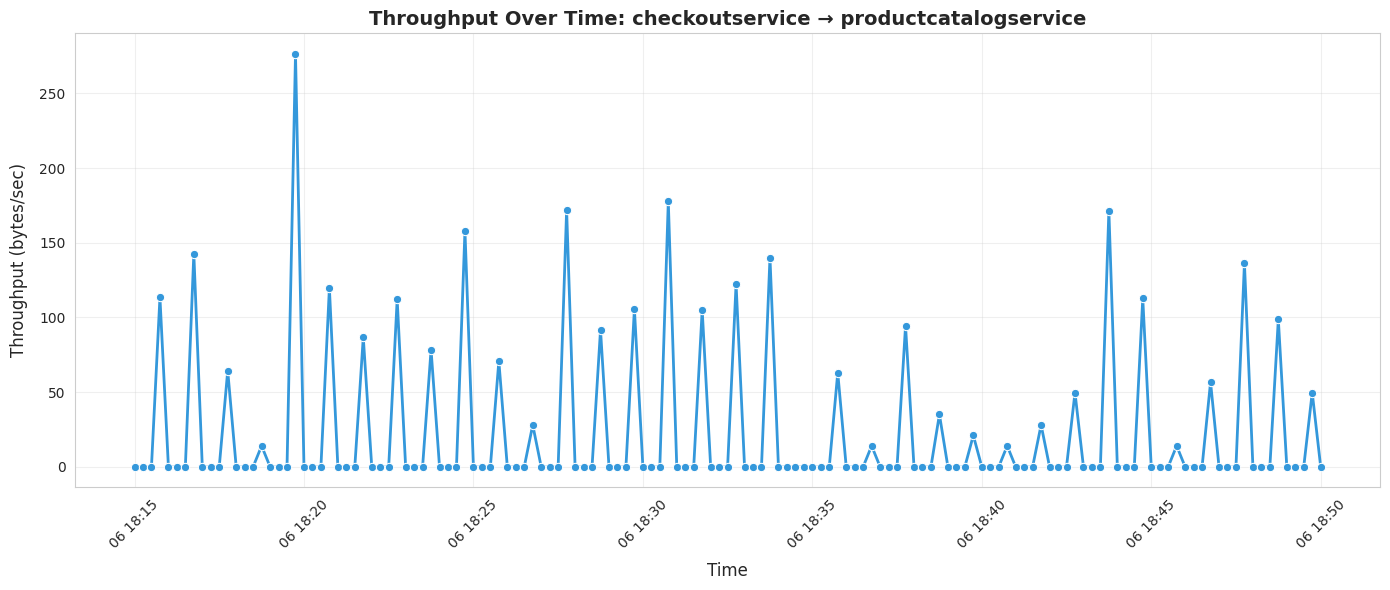

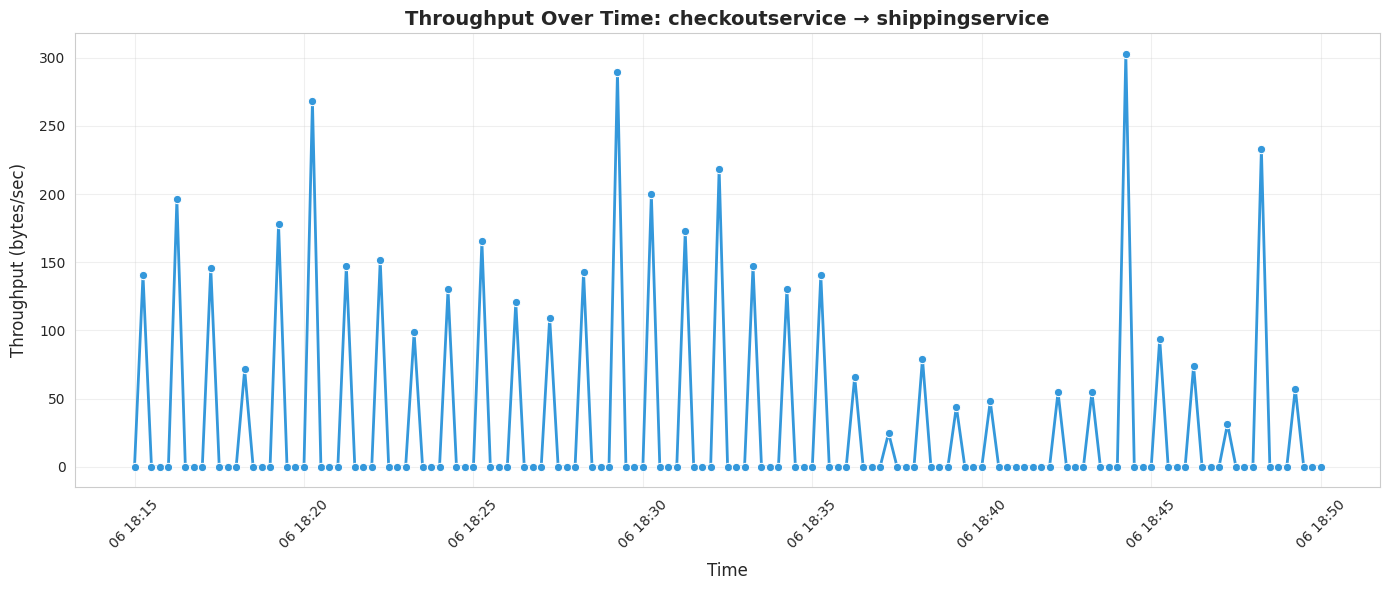

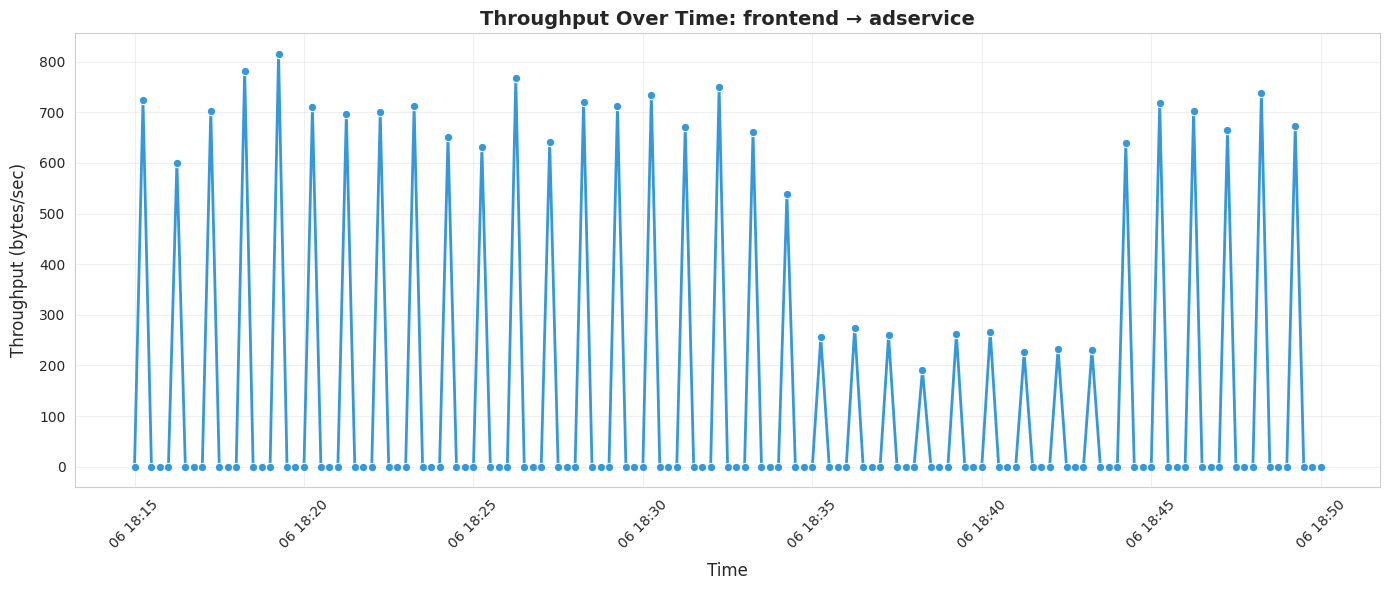

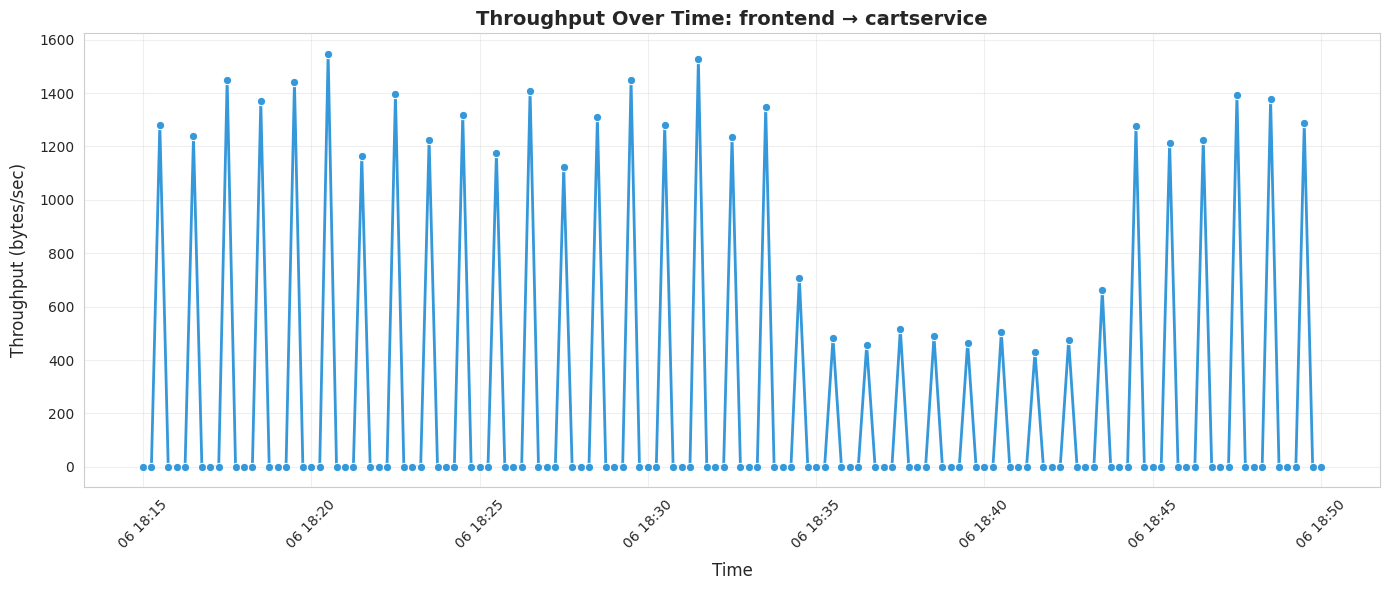

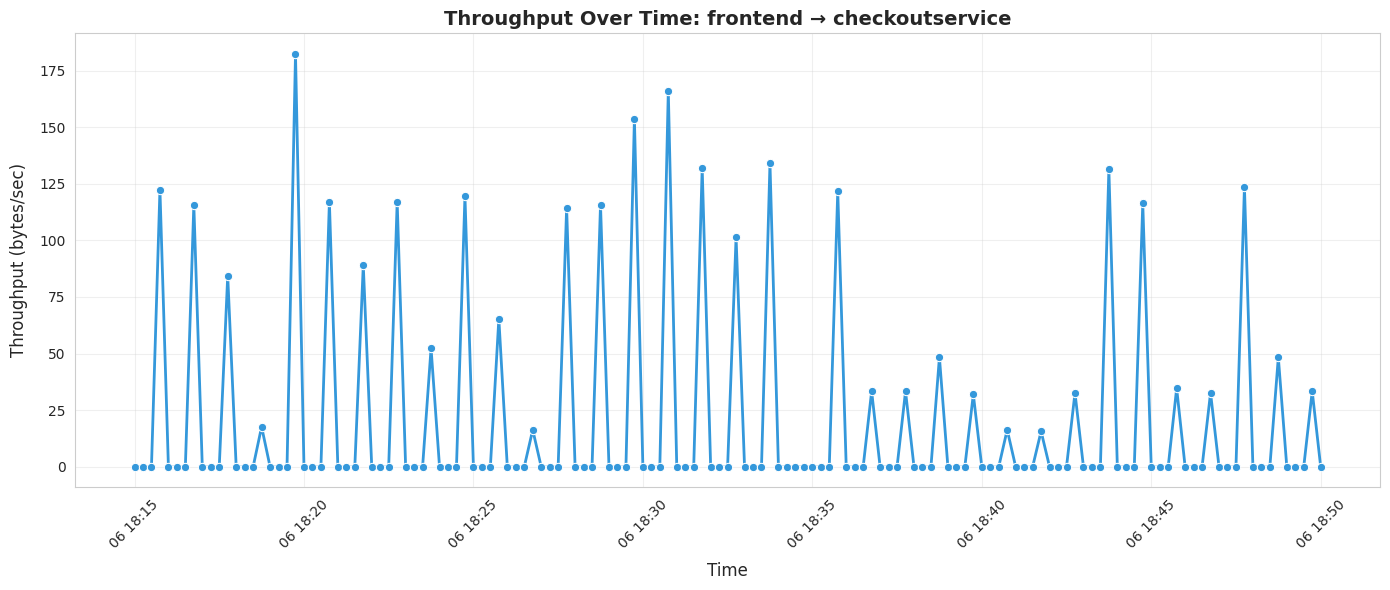

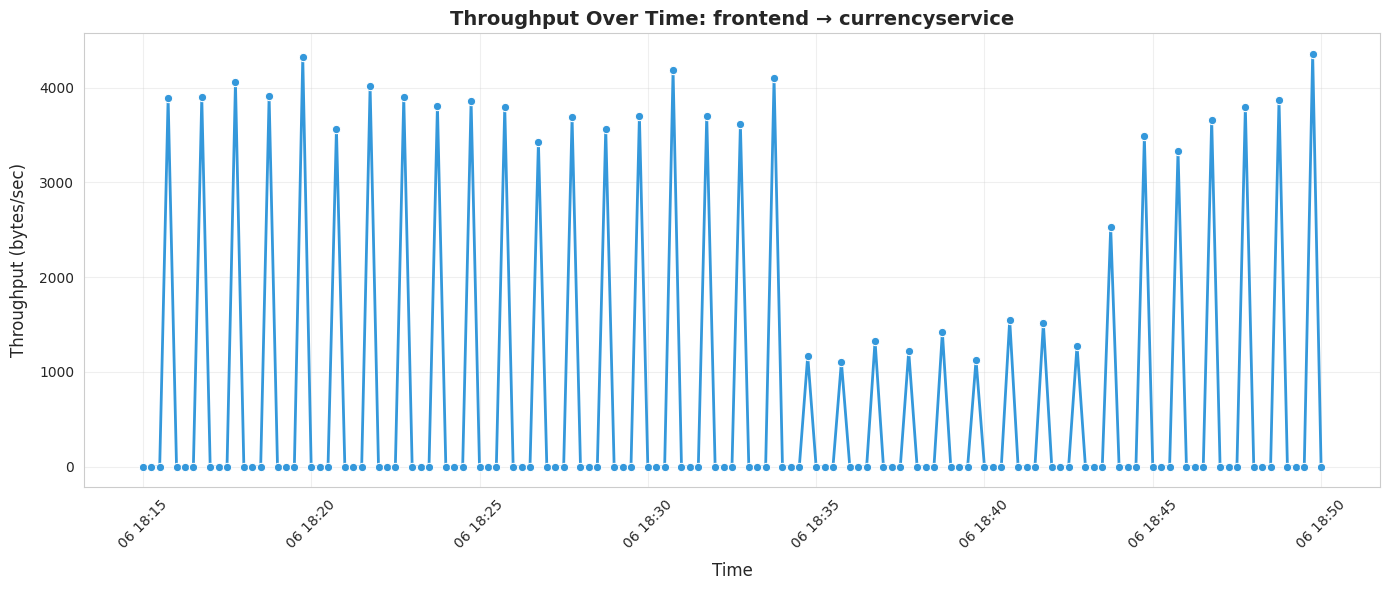

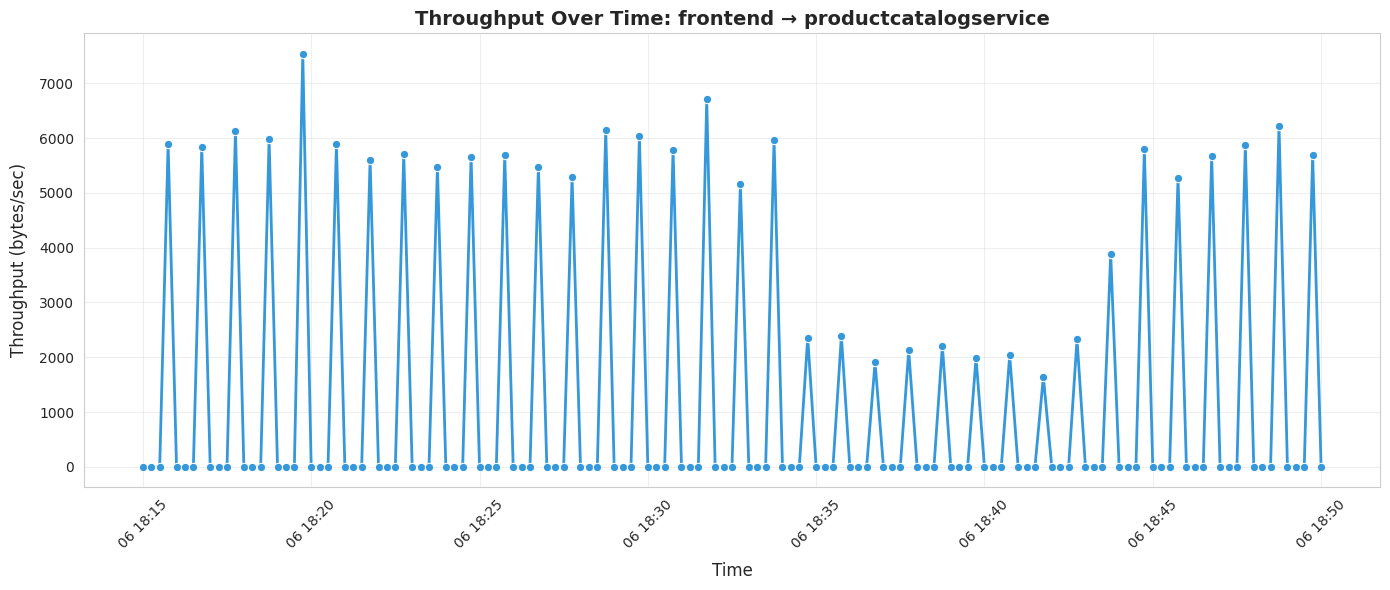

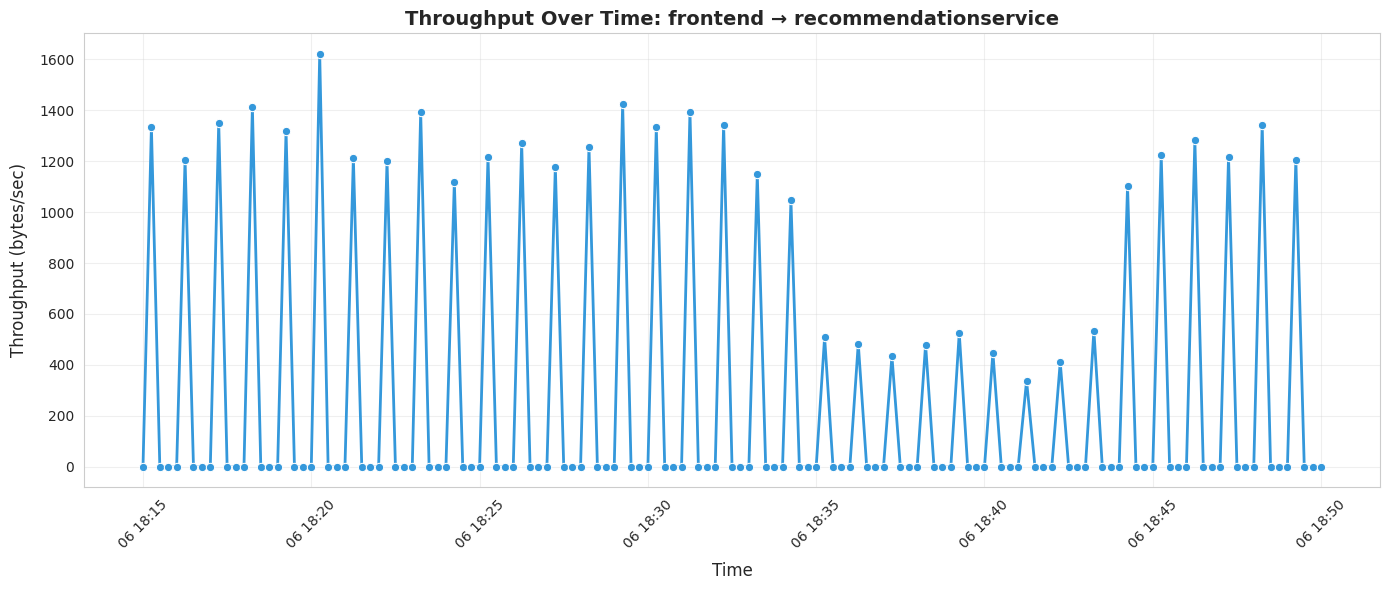

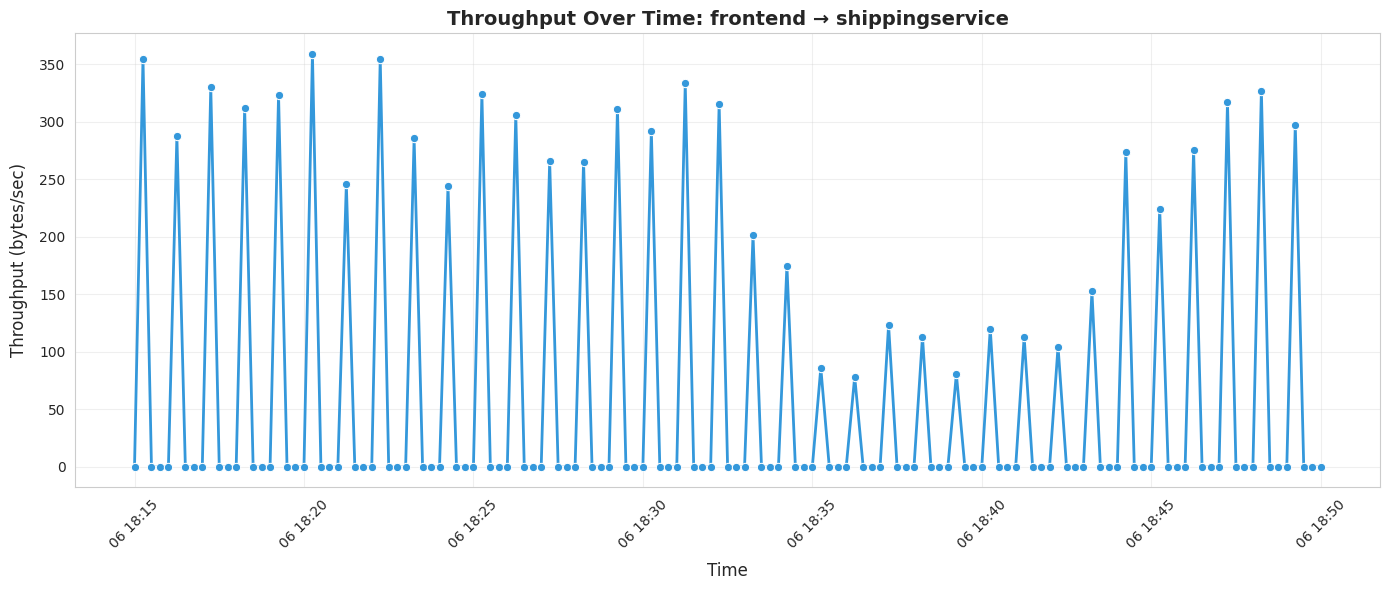

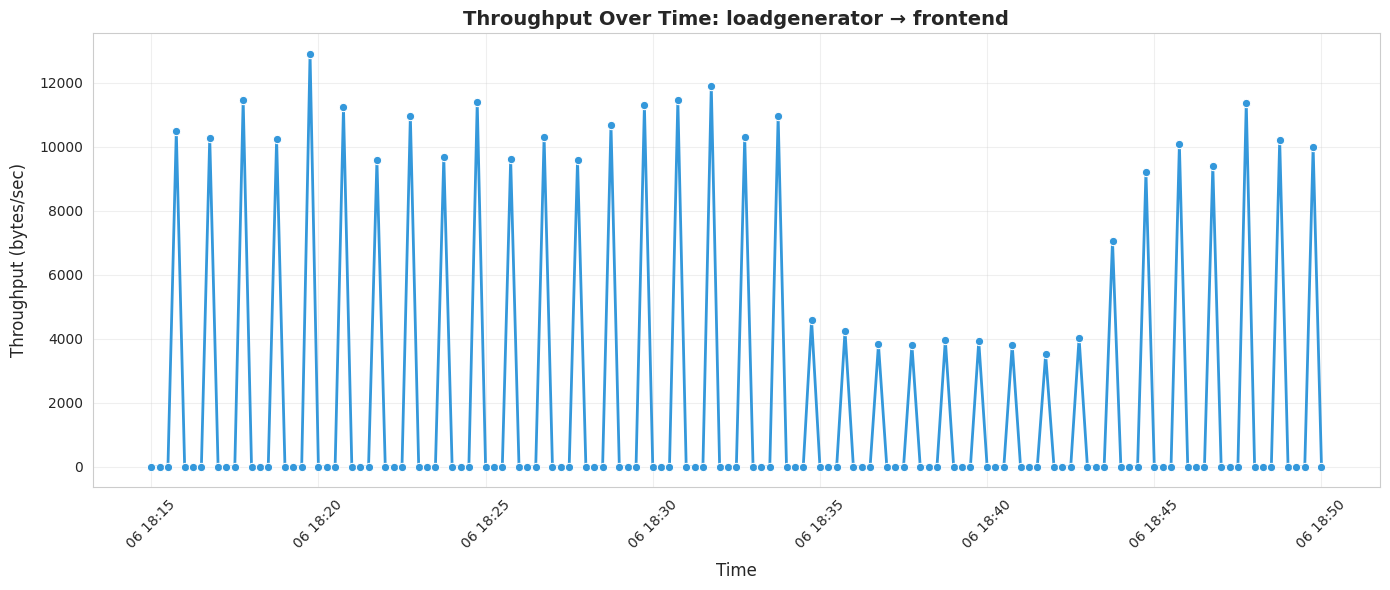

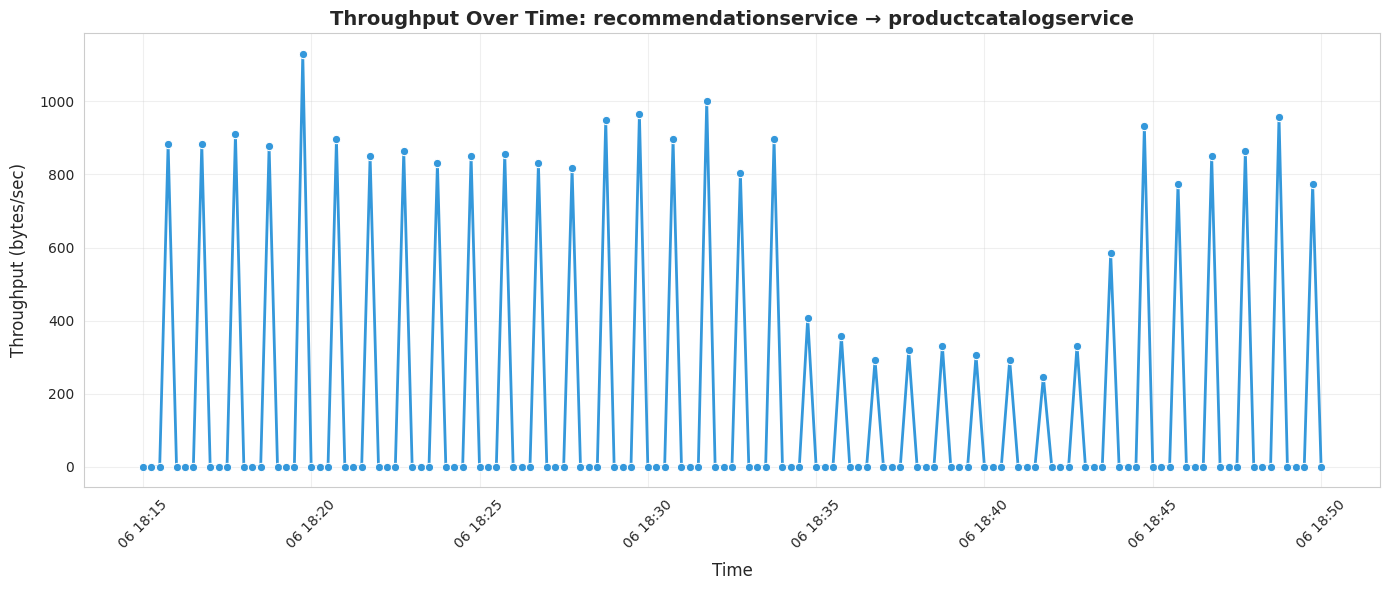

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
df = pd.read_csv('kiali_kpi_metrics.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a unique identifier for each service (source → destination)
df['service_pair'] = df['source_workload'] + " → " + df['destination_workload']

# Get unique services
services = df['service_pair'].unique()

# Create a plot for each service
for service in services:
    service_data = df[df['service_pair'] == service]
    
    plt.figure(figsize=(14, 6))
    sns.set_style("whitegrid")

    # Plot throughput over time for the service
    ax = sns.lineplot(
        data=service_data,
        x='timestamp',
        y='throughput',
        color='#3498db',  # Blue color
        linewidth=2,
        marker='o',
        markersize=6
    )

    # Formatting
    plt.title(f'Throughput Over Time: {service}', fontsize=14, fontweight='bold')
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Throughput (bytes/sec)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Show plot
    plt.tight_layout()
    plt.show()
